# Klasifikasi Sentimen menggunakan Recurrent Neural Network (RNN) & Long Short-Term Memory (LSTM)

### Anggota Kelompok 1

1. Zakiyah Hasanah (2305274) 
2. Putra Hadiyanto Nugroho (2308163)
3. Hafsah Hamidah (2311474)
4. Natasha Adinda Cantika (2312120)

## Pendahuluan

Klasifikasi sentimen adalah tugas inti dalam Natural Language Processing (NLP) yang berfokus pada penentuan polaritas emosi dalam teks. Proyek ini bertujuan untuk menguji batas kemampuan Deep Learning pada data Bahasa Indonesia yang kompleks dan heterogen, dikumpulkan dari berbagai sumber media sosial (cross-domain). Mengingat data yang digunakan adalah non-standar dan pelatihan embedding dilakukan dari awal, kami membandingkan kinerja tiga arsitektur Recurrent Neural Network (RNN) utama: SimpleRNN (model paling primitif), Long Short-Term Memory (LSTM), dan Bidirectional LSTM (Bi-LSTM). Melalui serangkaian eksperimen, kami menguji seberapa jauh peningkatan arsitektur dapat mengatasi keterbatasan data. Tujuan akhirnya adalah mengidentifikasi model mana yang paling stabil dan efektif untuk klasifikasi sentimen lintas domain, menetapkan batas kinerja yang dapat dicapai oleh model RNN pada data Bahasa Indonesia yang kompleks ini.

### Sumber Dataset
Tersedia di: https://github.com/rizalespe/Dataset-Sentimen-Analisis-Bahasa-Indonesia/

1. **dataset_tweet_sentiment_pilkada_DKI_2017.csv**<br>Lestari, A.R.T., Perdana, R.S., & Fauzi, M.A. (2017). Analisis Sentimen Tentang Opini Pilkada DKI 2017 Pada Dokumen Twitter Berbahasa Indonesia Menggunakan Naïve Bayes dan Pembobotan Emoji. Jurnal Pengembangan Teknologi Informasi Dan Ilmu Komputer, 1(12), 1718-1724. Diambil dari http://j-ptiik.ub.ac.id/index.php/j-ptiik/article/view/627
2. **dataset_tweet_sentiment_cellular_service_provider.csv**<br>Rofiqoh, U., Perdana, R.S., & Fauzi, M.A. (2017). Analisis Sentimen Tingkat Kepuasan Pengguna Penyedia Layanan Telekomunikasi Seluler Indonesia Pada Twitter Dengan Metode Support Vector Machine dan Lexicon Based Features. Jurnal Pengembangan Teknologi Informasi Dan Ilmu Komputer, 1(12), 1725-1732. Diambil dari http://j-ptiik.ub.ac.id/index.php/j-ptiik/article/view/628
3. **dataset_komentar_instagram_cyberbullying.csv**<br>Luqyana, W., Cholissodin, I., & Perdana, R.S. (2018). Analisis Sentimen Cyberbullying pada Komentar Instagram dengan Metode Klasifikasi Support Vector Machine. Jurnal Pengembangan Teknologi Informasi Dan Ilmu Komputer, 2(11), 4704-4713. Diambil dari http://j-ptiik.ub.ac.id/index.php/j-ptiik/article/view/3051
4. **dataset_tweet_sentimen_tayangan_tv.csv**<br>Nurjanah, W.E., Perdana, R.S., & Fauzi, M.A. (2017). Analisis Sentimen Terhadap Tayangan Televisi Berdasarkan Opini Masyarakat pada Media Sosial Twitter menggunakan Metode K-Nearest Neighbor dan Pembobotan Jumlah Retweet. Jurnal Pengembangan Teknologi Informasi Dan Ilmu Komputer, 1(12), 1750-1757. Diambil dari http://j-ptiik.ub.ac.id/index.php/j-ptiik/article/view/631
5. **dataset_tweet_sentimen_opini_film.csv**<br>Antinasari, P., Perdana, R.S., & Fauzi, M.A. (2017). Analisis Sentimen Tentang Opini Film Pada Dokumen Twitter Berbahasa Indonesia Menggunakan Naive Bayes Dengan Perbaikan Kata Tidak Baku. Jurnal Pengembangan Teknologi Informasi Dan Ilmu Komputer, 1(12), 1733-1741. Diambil dari http://j-ptiik.ub.ac.id/index.php/j-ptiik/article/view/629

## Install Library

In [1]:
!pip install wordcloud
import nltk; nltk.download('punkt')


[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter

# --- Impor untuk Preprocessing & Visualisasi ---
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud # <-- MODUL YANG HILANG

# --- Impor untuk Scikit-learn & Modeling ---
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import class_weight
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

2025-10-14 15:23:06.940902: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-14 15:23:06.948576: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-10-14 15:23:06.991567: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-10-14 15:23:06.991877: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-10-14 15:23:06.993345: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

## Read dan Import Dataset

In [3]:
df_instagram = pd.read_csv('https://raw.githubusercontent.com/beginnener/DeepLearning_RNN/refs/heads/main/dataset/dataset-sentimen/dataset_komentar_instagram_cyberbullying.csv')
df_twitter_tayangan = pd.read_csv('https://raw.githubusercontent.com/beginnener/DeepLearning_RNN/refs/heads/main/dataset/dataset-sentimen/dataset_tweet_sentimen_tayangan_tv.csv')
df_twitter_provider = pd.read_csv('https://raw.githubusercontent.com/beginnener/DeepLearning_RNN/refs/heads/main/dataset/dataset-sentimen/dataset_tweet_sentiment_cellular_service_provider.csv')
df_twitter_film = pd.read_csv('https://raw.githubusercontent.com/beginnener/DeepLearning_RNN/refs/heads/main/dataset/dataset-sentimen/dataset_tweet_sentiment_opini_film.csv')
df_twitter_pilkada = pd.read_csv('https://raw.githubusercontent.com/beginnener/DeepLearning_RNN/refs/heads/main/dataset/dataset-sentimen/dataset_tweet_sentiment_pilkada_DKI_2017.csv')

df_stopword_pilkada = pd.read_csv('https://raw.githubusercontent.com/beginnener/DeepLearning_RNN/refs/heads/main/dataset/dataset-sentimen/stopword_tweet_pilkada_DKI_2017.csv')
df_master_emoji = pd.read_csv ('https://raw.githubusercontent.com/rizalespe/Dataset-Sentimen-Analisis-Bahasa-Indonesia/refs/heads/master/master_emoji.csv')

### Info Struktur Dataset

In [4]:
print("Info Dataset Instagram")
df_instagram.info()
print("\nInfo Dataset Twitter Tayangan")
df_twitter_tayangan.info()
print("\nInfo Dataset Twitter Provider")
df_twitter_provider.info()
print("\nInfo Dataset Twitter Film")
df_twitter_film.info()
print("\nInfo Dataset Twitter Pilkada")
df_twitter_pilkada.info()

Info Dataset Instagram
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      400 non-null    int64 
 1   Sentiment               400 non-null    object
 2   Instagram Comment Text  400 non-null    object
dtypes: int64(1), object(2)
memory usage: 9.5+ KB

Info Dataset Twitter Tayangan
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              400 non-null    int64 
 1   Sentiment       400 non-null    object
 2   Acara TV        400 non-null    object
 3   Jumlah Retweet  400 non-null    int64 
 4   Text Tweet      400 non-null    object
dtypes: int64(2), object(3)
memory usage: 15.8+ KB

Info Dataset Twitter Provider
<class 'pandas.core.frame.DataFrame'>


Tahap ini menampilkan informasi struktural dari kelima dataset yang akan digunakan, yaitu Instagram, Twitter Tayangan, Twitter Provider, Twitter Film, dan Twitter Pilkada.

Dapat dilihat bahwa setiap dataset memiliki jumlah data yang lengkap (tidak ada nilai null), sehingga tidak diperlukan penanganan missing value. Kolom utama yang akan difokuskan dalam proyek ini adalah kolom Sentimen (sebagai label) dan kolom teks (Instagram Comment Text atau Text Tweet) yang akan disiapkan dan digabungkan pada langkah berikutnya.

## Penggabungan dan Standarisasi Kolom Dataset

Bagian ini bertujuan untuk menggabungkan kelima dataset yang berbeda menjadi satu DataFrame tunggal yang bersih.

Fungsi standardized_df memastikan setiap dataset mengalami:

    1. Penyeragaman Kolom: Kolom sentimen dan teks di-rename menjadi 'Sentiment' dan 'Text'.

    2. Penambahan Sumber: Kolom 'Source' ditambahkan untuk melacak asal data (Instagram atau Twitter topik tertentu).

    3. Standarisasi Label: Nilai di kolom 'Sentiment' diubah menjadi huruf kecil (lowercase) untuk konsistensi.

Setelah diproses, semua DataFrame digabungkan menggunakan pd.concat menjadi df_combined, yang menampilkan total baris data gabungan dan lima baris pertamanya.

In [5]:
def standardized_df(df, source_name, sentiment_col, text_col):
    # Rename kolom ke nama yg terstandarisasi
    df = df.rename(columns={sentiment_col: 'Sentiment', text_col: 'Text'})

    # ambil kolom yang diperlukan saja (sentiment dan text)
    df = df[['Sentiment', 'Text']]

    # tambahkan kolom source
    df['Source'] = source_name

    # standarisasi isi kolom Sentiment dengan diubah ke lowercase
    df['Sentiment'] = df['Sentiment'].astype(str).str.lower()

    return df

datasets = [
    (df_instagram, 'Instagram_Cyberbullying', 'Sentiment', 'Instagram Comment Text'),
    (df_twitter_tayangan, 'Twitter_TayanganTV', 'Sentiment', 'Text Tweet'),
    (df_twitter_provider, 'Twitter_CellularProvider', 'Sentiment', 'Text Tweet'),
    (df_twitter_film, 'Twitter_OpiniFilm', 'Sentiment', 'Text Tweet'),
    (df_twitter_pilkada, 'Twitter_PilkadaDKI', 'Sentiment', 'Text Tweet')
]

all_dfs = []

for df, source, sentiment_col, text_col in datasets:
    try:
        df_standard = standardized_df(df, source, sentiment_col, text_col)
        all_dfs.append(df_standard)
        print(f"✅ Berhasil memproses: {source} ({len(df_standard)} baris)")
    except KeyError as e:
        print(f"❌ GAGAL memproses: {source}")
        print(f"   Error: {e}")
        print(f"   Kolom yang Tersedia di file ini: {list(df.columns)}")

df_combined = pd.concat(all_dfs, ignore_index=True)
print("\n" + "="*50)
print("             Dataset Gabungan Berhasil Dibuat")
print("="*50)
print(f"Total Jumlah Baris Dataset Gabungan: {len(df_combined)}")
df_combined.info()
print("\n5 Baris Pertama Data:")
df_combined.head(5)

# # Menyalin df_combined ke df_combined_copy
# df_combined_copy = df_combined.copy()

✅ Berhasil memproses: Instagram_Cyberbullying (400 baris)
✅ Berhasil memproses: Twitter_TayanganTV (400 baris)
✅ Berhasil memproses: Twitter_CellularProvider (300 baris)
✅ Berhasil memproses: Twitter_OpiniFilm (200 baris)
✅ Berhasil memproses: Twitter_PilkadaDKI (900 baris)

             Dataset Gabungan Berhasil Dibuat
Total Jumlah Baris Dataset Gabungan: 2200
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentiment  2200 non-null   object
 1   Text       2200 non-null   object
 2   Source     2200 non-null   object
dtypes: object(3)
memory usage: 51.7+ KB

5 Baris Pertama Data:


,Sentiment,Text,Source
0,negative,<USERNAME> TOLOL!! Gak ada hubungan nya kegug...,Instagram_Cyberbullying
1,negative,Geblek lo tata...cowo bgt dibela2in balikan......,Instagram_Cyberbullying
2,negative,Kmrn termewek2 skr lengket lg duhhh kok labil ...,Instagram_Cyberbullying
3,negative,"Intinya kalau kesel dengan ATT nya, gausah ke ...",Instagram_Cyberbullying
4,negative,"hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha...",Instagram_Cyberbullying


Total baris data yang berhasil dikumpulkan adalah 2200 baris. DataFrame final memiliki tiga kolom utama: Sentiment, Text (kolom teks yang sudah diseragamkan), dan Source (sumber data asli). Semua kolom memiliki data lengkap (non-null).

### Eksplorasi Data Awal (Dataset Gabungan)

In [6]:
# Periksa informasi umum
print("\n--- Info Umum Dataset Gabungan ---")
df_combined.info()

# Periksa nilai unik pada kolom Sentiment dan Source
print("\n--- Nilai Unik Kolom Sentimen ---")
print(df_combined['Sentiment'].value_counts())

print("\n--- Nilai Unik Kolom Sumber (Source) ---")
print(df_combined['Source'].value_counts())


--- Info Umum Dataset Gabungan ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentiment  2200 non-null   object
 1   Text       2200 non-null   object
 2   Source     2200 non-null   object
dtypes: object(3)
memory usage: 51.7+ KB

--- Nilai Unik Kolom Sentimen ---
Sentiment
negative    1111
positive    1089
Name: count, dtype: int64

--- Nilai Unik Kolom Sumber (Source) ---
Source
Twitter_PilkadaDKI          900
Instagram_Cyberbullying     400
Twitter_TayanganTV          400
Twitter_CellularProvider    300
Twitter_OpiniFilm           200
Name: count, dtype: int64


Distribusi Sentimen, data sentimen terbagi menjadi dua kelas utama: 'negative' (1111 baris) dan 'positive' (1089 baris). Distribusi ini menunjukkan bahwa dataset tergolong seimbang, yang ideal untuk pelatihan model klasifikasi biner (dua kelas).

Distribusi Sumber menunjukkan kontribusi jumlah baris dari setiap sumber data. Sumber Twitter_PilkadaDKI adalah yang paling dominan (900 baris), diikuti oleh Instagram_Cyberbullying dan Twitter_TayanganTV (masing-masing 400 baris).

/tmp/ipykernel_1430/2528441767.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df_combined, order=df_combined['Sentiment'].value_counts().index, palette="viridis")


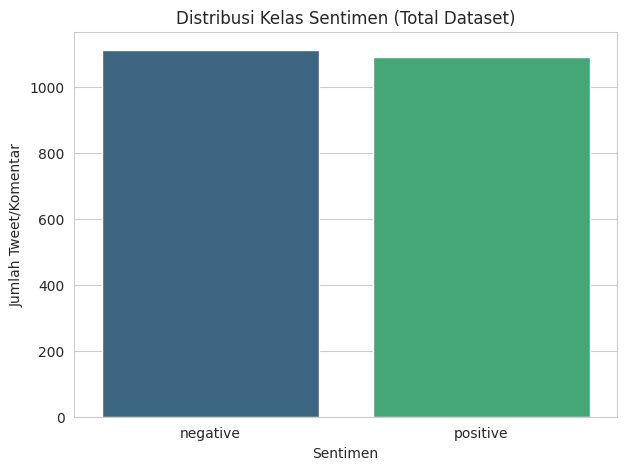

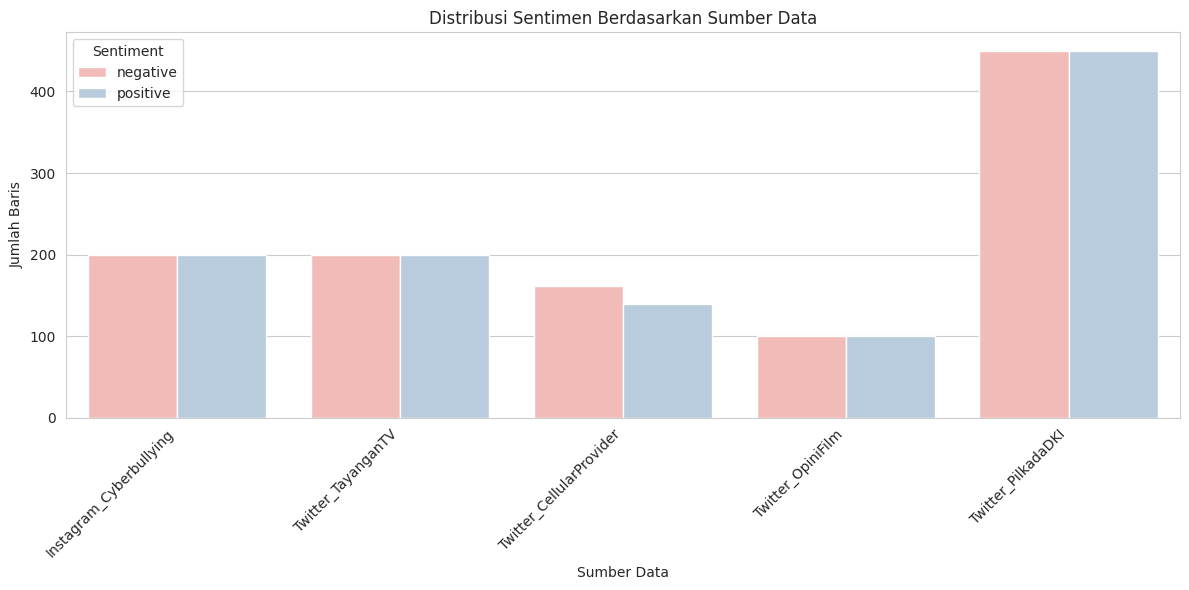

In [7]:
sns.set_style("whitegrid")

# --- Visualisasi 1: Distribusi Sentimen Total ---
plt.figure(figsize=(7, 5))
sns.countplot(x='Sentiment', data=df_combined, order=df_combined['Sentiment'].value_counts().index, palette="viridis")
plt.title('Distribusi Kelas Sentimen (Total Dataset)')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Tweet/Komentar')
plt.show()

# --- Visualisasi 2: Distribusi Sentimen Berdasarkan Sumber ---
plt.figure(figsize=(12, 6))
sns.countplot(x='Source', hue='Sentiment', data=df_combined, palette="Pastel1")
plt.title('Distribusi Sentimen Berdasarkan Sumber Data')
plt.xlabel('Sumber Data')
plt.ylabel('Jumlah Baris')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Visualisasi yang ditampilkan menguatkan hasil eksplorasi data sebelumnya. Grafik batang di bagian atas menunjukkan keseimbangan yang sangat baik antara kelas 'negative' dan 'positive' pada keseluruhan dataset gabungan, yang merupakan kondisi ideal untuk meminimalkan bias model klasifikasi.

Sementara itu, grafik di bagian bawah merincikan distribusi sentimen berdasarkan sumber data asalnya. Dapat diamati bahwa mayoritas sumber, termasuk Instagram Cyberbullying, Twitter Tayangan TV, dan Twitter Opini Film, memiliki pembagian sentimen yang juga relatif seimbang. Meskipun data Twitter Pilkada DKI menyumbang jumlah baris paling banyak, distribusinya antara sentimen negatif dan positif di dalamnya juga terlihat setara.


--- Statistik Panjang Teks Gabungan ---
count    2200.000000
mean      107.989545
std        57.833709
min         4.000000
25%        70.000000
50%       106.000000
75%       134.000000
max       888.000000
Name: Text_Length, dtype: float64
/tmp/ipykernel_1430/3245009126.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Source', y='Text_Length', data=df_combined, palette="Set2")


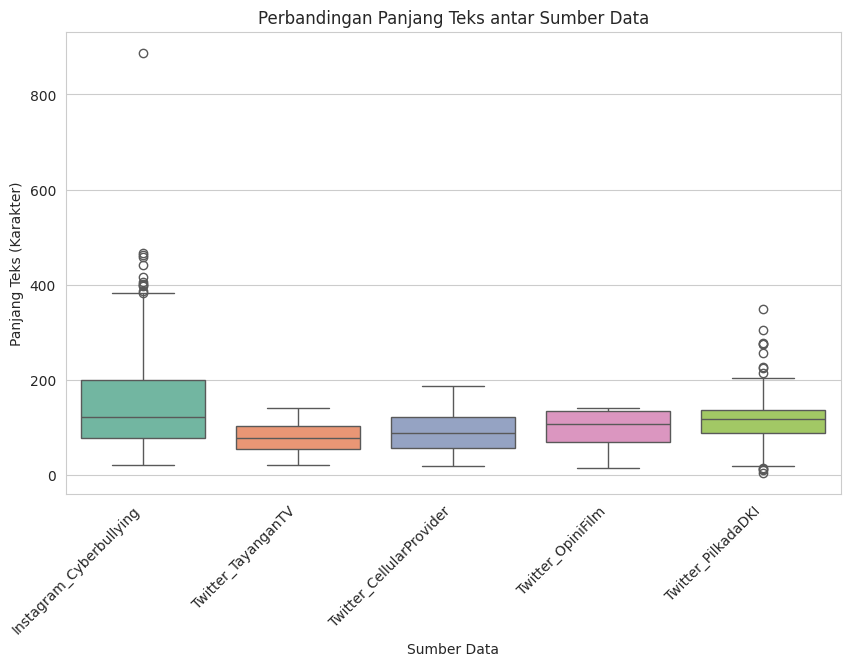

In [8]:
# Menghitung panjang teks untuk analisis
df_combined['Text_Length'] = df_combined['Text'].apply(lambda x: len(str(x)))

print("\n--- Statistik Panjang Teks Gabungan ---")
print(df_combined['Text_Length'].describe())

# Perbandingan panjang teks antar sumber data (untuk melihat perbedaan gaya bahasa)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Source', y='Text_Length', data=df_combined, palette="Set2")
plt.title('Perbandingan Panjang Teks antar Sumber Data')
plt.xlabel('Sumber Data')
plt.ylabel('Panjang Teks (Karakter)')
plt.xticks(rotation=45, ha='right')
plt.show()

Analisis ini menunjukkan statistik deskriptif dan visualisasi perbandingan panjang teks antar sumber data. Secara keseluruhan, panjang teks rata-rata (mean) adalah sekitar 107 karakter, dengan nilai maksimum (max) mencapai 888 karakter, mengindikasikan adanya outlier yang sangat panjang. Visualisasi boxplot menunjukkan bahwa outlier terpanjang berasal dari Instagram Cyberbullying. Sementara itu, rata-rata panjang teks untuk semua sumber data cenderung berada dalam rentang yang relatif seragam, kebanyakan di bawah 200 karakter, yang merupakan karakteristik umum dari data media sosial seperti Twitter dan komentar singkat.

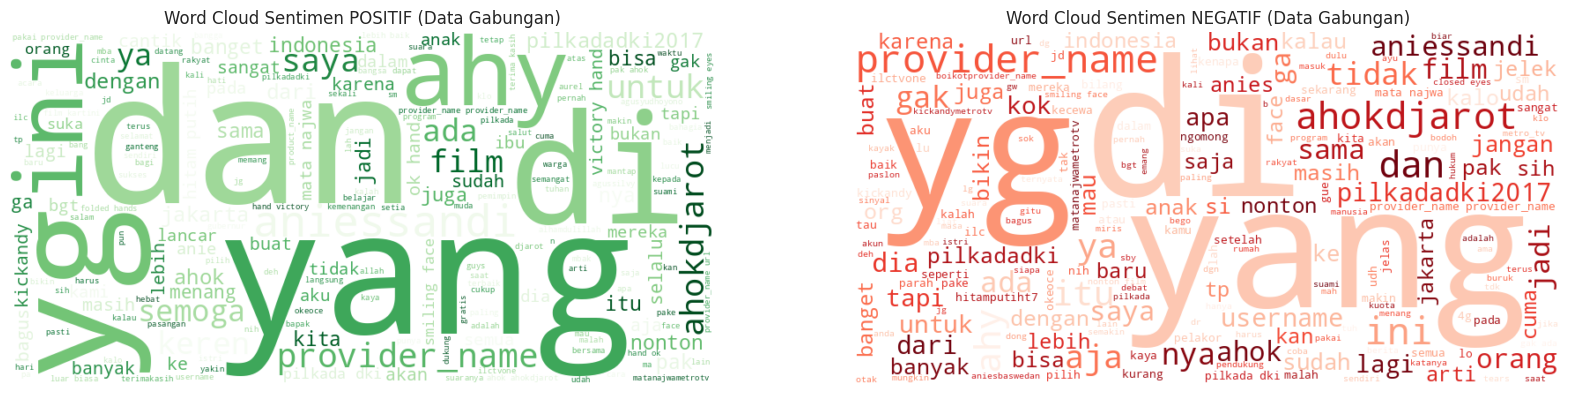

In [9]:
import re

# --- 1. Fungsi Pembersihan Teks Dasar ---
def clean_text_basic(text):
    text = str(text).lower()  # pastikan lowercase
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # hapus URL
    text = re.sub(r'[^\w\s]', '', text)  # hapus tanda baca (non huruf/angka)
    return text.strip()

df_cloud = df_combined.copy()

# --- 2. Aplikasi ke DataFrame Baru ---
# misalnya df adalah DataFrame baru kamu
df_cloud['Clean_Text_Basic'] = df_cloud['Text'].apply(clean_text_basic)

# --- 3. Pemisahan Berdasarkan Sentimen ---
positive_text_combined = " ".join(
    df_cloud[df_cloud['Sentiment'] == 'positive']['Clean_Text_Basic'].tolist()
)
negative_text_combined = " ".join(
    df_cloud[df_cloud['Sentiment'] == 'negative']['Clean_Text_Basic'].tolist()
)

# --- Word Cloud ---
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Word Cloud Sentimen POSITIF Gabungan
wordcloud_pos = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(positive_text_combined)
axes[0].imshow(wordcloud_pos, interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title('Word Cloud Sentimen POSITIF (Data Gabungan)')

# Word Cloud Sentimen NEGATIF Gabungan
wordcloud_neg = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_text_combined)
axes[1].imshow(wordcloud_neg, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title('Word Cloud Sentimen NEGATIF (Data Gabungan)')

plt.show()

Word Cloud ini memvisualisasikan kata-kata yang paling sering muncul di dataset gabungan, dipisahkan berdasarkan sentimen.

Pada Word Cloud Sentimen POSITIF (kiri), kata-kata yang dominan cenderung netral atau mendukung, seperti "yang", "dan", "banyak", serta beberapa entitas yang muncul berulang dari berbagai topik, seperti "ahok" dan "provider".

Sebaliknya, pada Word Cloud Sentimen NEGATIF (kanan), dominasi kata-kata seperti "yang", "di", "tidak", "ini", dan kata-kata yang mengandung unsur ketidakpuasan atau penolakan, bersama dengan entitas "ahokdjarot" dan "ANIES", mengindikasikan isu-isu utama yang memicu sentimen negatif dalam data. Analisis ini memberikan wawasan awal mengenai kosakata yang membedakan kedua kelas sentimen.

In [10]:
# Menggabungkan semua kata setelah pembersihan dasar
all_words_combined = positive_text_combined.split() + negative_text_combined.split()

# Menghitung 10 kata yang paling umum (TERMASUK stopwords dan noise)
word_counts_combined = Counter(all_words_combined)
top_10_words_combined = pd.DataFrame(word_counts_combined.most_common(20), columns=['Kata', 'Jumlah']) # Mencetak 20 untuk melihat lebih banyak noise

print("\n--- Top 20 Kata Paling Umum di Dataset Gabungan (Mentah) ---")
print(top_10_words_combined)


--- Top 20 Kata Paling Umum di Dataset Gabungan (Mentah) ---
              Kata  Jumlah
0               di     446
1    provider_name     418
2             yang     416
3              dan     378
4               yg     337
5              ini     286
6              ahy     277
7       ahokdjarot     243
8             film     216
9       aniessandi     196
10             ada     184
11              ya     179
12            ahok     176
13             itu     163
14            saya     158
15            face     154
16           tidak     151
17  pilkadadki2017     150
18            jadi     144
19           untuk     144


Analisis ini menunjukkan 20 kata yang paling sering muncul di seluruh dataset gabungan, sebelum proses stopword removal dan pembersihan karakter secara menyeluruh. Daftar ini didominasi oleh stopword Bahasa Indonesia seperti "di", "yang", dan "dan". Selain itu, terdapat pula entitas spesifik dari dataset yang berbeda, seperti "provider_name", "ahokdjarot", dan "aniessandi", yang mengindikasikan bahwa data masih mengandung banyak noise dan kata-kata yang tidak memiliki makna sentimen kuat. Hasil ini memvalidasi pentingnya tahap preprocessing selanjutnya.

## Pra-pemrosesan Teks

### Dictionary Singkatan

Data dari media sosial sering menggunakan bahasa non-baku, singkatan, dan slang. Untuk memastikan keakuratan klasifikasi, kita perlu menstandarisasi bahasa tersebut. Tahap ini mendefinisikan kamus (dictionary) yang akan digunakan untuk normalisasi, yaitu mengubah kata-kata non-baku (seperti 'yg', 'ga', 'bgt') menjadi padanan kata bakunya (seperti 'yang', 'tidak', 'banget').

In [11]:
slang_dictionary = {
    # --- Abbreviations & Shortenings ---
    'yg': 'yang',
    'ga': 'tidak',
    'gak': 'tidak',
    'gk': 'tidak',
    'enggk': 'tidak',
    'tdk': 'tidak',
    'gausah': 'tidak usah',
    'bgt': 'banget',
    'bangeg': 'banget',
    'bngtt': 'banget',
    'lg': 'lagi',
    'sm': 'sama',
    'dgn': 'dengan',
    'krn': 'karena',
    'klo': 'kalau',
    'kalo': 'kalau',
    'kl': 'kalau',
    'dr': 'dari',
    'utk': 'untuk',
    'bwt': 'buat',
    'sdh': 'sudah',
    'udh': 'sudah',
    'dah': 'sudah',
    'dh': 'sudah',
    'jd': 'jadi',
    'jdi': 'jadi',
    'bkn': 'bukan',
    'knp': 'kenapa',
    'ngapa': 'kenapa',
    'gmn': 'bagaimana',
    'gimana': 'bagaimana',
    'kpn': 'kapan',
    'brp': 'berapa',
    'sbrpa': 'seberapa',
    'trs': 'terus',
    'trus': 'terus',
    'jg': 'juga',
    'jga': 'juga',
    'aja': 'saja',
    'aj': 'saja',
    'ajah': 'saja',
    'sbnrnya': 'sebenarnya',
    'pdhl': 'padahal',
    'dlm': 'dalam',
    'bnyk': 'banyak',
    'sblm': 'sebelum',
    'org': 'orang',
    'orng': 'orang',
    'org2': 'orang-orang',
    'tp': 'tapi',
    'pny': 'punya',
    'ttp': 'tetap',
    'kyk': 'seperti',
    'bs': 'bisa',
    'skrg': 'sekarang',
    'skr': 'sekarang',
    'kmrn': 'kemarin',
    'sampe': 'sampai',
    'ampe': 'sampai',
    'ntar': 'nanti',
    'lgsg': 'langsung',
    'bbrp': 'beberapa',
    'gt': 'begitu',
    'gini': 'begini',
    'bgini': 'begini',
    'dpn': 'depan',
    'blg': 'bilang',
    'lwt': 'lewat',
    'ig': 'instagram',
    'tps': 'tempat pemungutan suara',
    'kjp': 'kartu jakarta pintar',
    'rt': 'rumah tangga',
    'dpr': 'dewan perwakilan rakyat',
    'kpk': 'komisi pemberantasan korupsi',
    'mui': 'majelis ulama indonesia',
    'pki': 'partai komunis indonesia',
    'tni': 'tentara nasional indonesia',
    'msh': 'masih',
    'bhs': 'bahasa',
    'sy': 'saya',

    # --- Slang & Colloquialisms ---
    'lo': 'kamu',
    'loe': 'kamu',
    'lu': 'kamu',
    'elu': 'kamu',
    'situ': 'kamu',
    'gw': 'saya',
    'gue': 'saya',
    'ane': 'saya',
    'gua': 'saya',
    'kita': 'kami',
    'kitenya': 'kami',
    'dese': 'dia',
    'doi': 'dia',
    'doski': 'dia',
    'cowo': 'pria',
    'cwo': 'pria',
    'cewe': 'wanita',
    'cwe': 'wanita',
    'lakik': 'pria',
    'brempuan': 'perempuan',
    'pake': 'pakai',
    'kayak': 'seperti',
    'kek': 'seperti',
    'kya': 'seperti',
    'ky': 'seperti',
    'gitu': 'begitu',
    'gini': 'begini',
    'gitu' : 'begitu',
    'gini': 'begini',
    'gpp': 'tidak apa-apa',
    'gapapa': 'tidak apa-apa',
    'nggak': 'tidak',
    'bilang': 'mengatakan',
    'ngomong': 'berbicara',
    'ngmg': 'berbicara',
    'ngobrol': 'berbincang',
    'liat': 'lihat',
    'liyat': 'lihat',
    'nonton': 'menonton',
    'ntn': 'menonton',
    'bikin': 'membuat',
    'tau': 'tahu',
    'tauk': 'tahu',
    'nyaho': 'tahu rasa',
    'kasian': 'kasihan',
    'kacian': 'kasihan',
    'banget': 'sangat',
    'bener': 'benar',
    'beneran': 'sungguh-sungguh',
    'emang': 'memang',
    'aja': 'saja',
    'doang': 'saja',
    'doank': 'saja',
    'mulu': 'selalu',
    'melulu': 'selalu',
    'lagi': 'sedang',
    'udahan': 'sudah',
    'udah': 'sudah',
    'kok': '', # Filler word, often removed
    'sih': '', # Filler word, often removed
    'deh': '', # Filler word, often removed
    'dong': '', # Filler word, often removed
    'lah': '', # Filler word, often removed
    'lho': '', # Filler word, often removed
    'loh': '', # Filler word, often removed
    'nih': 'ini',
    'ni': 'ini',
    'noh': 'itu',
    'tuh': 'itu',
    'to': 'itu',
    'dulu': 'dahulu',
    'dlu': 'dahulu',
    'ntar': 'nanti',
    'entar': 'nanti',
    'begini': 'seperti ini',
    'begitu': 'seperti itu',
    'gitu': 'seperti itu',
    'gini': 'seperti ini',
    'kayaknya': 'sepertinya',
    'keknya': 'sepertinya',
    'kayaknya': 'sepertinya',
    'geblek': 'bodoh',
    'bego': 'bodoh',
    'goblok': 'bodoh',
    'goblog': 'bodoh',
    'govlok': 'bodoh',
    'tolol': 'bodoh',
    'oon': 'bodoh',
    'begok': 'bodoh',
    'begoh': 'bodoh',
    'dungu': 'bodoh',
    'kampungan': 'norak',
    'kamfungan': 'norak',
    'kampyuung': 'norak',
    'norak': 'kampungan',
    'alay': 'norak',
    'lebay': 'berlebihan',
    'jijik': 'menjijikkan',
    'najis': 'menjijikkan',
    'males': 'malas',
    'mager': 'malas gerak',
    'baper': 'terbawa perasaan',
    'curhat': 'mencurahkan isi hati',
    'nyinyir': 'mengkritik',
    'julid': 'dengki',
    'gatel': 'genit',
    'pelakor': 'perebut laki orang',
    'valakor': 'perebut laki orang',
    'lonte': 'pelacur',
    'jablay': 'pelacur',
    'pecun': 'pelacur',
    'bencong': 'waria',
    'banci': 'waria',
    'homo': 'homoseksual',
    'lesbi': 'lesbian',
    'bacot': 'banyak bicara',
    'congor': 'mulut', # (derogatory)
    'nyampah': 'mengotori',
    'plagiat': 'penjiplak',
    'hoax': 'berita bohong',
    'wkwkwk': 'tertawa', # representasi tawa
    'hahaha': 'tertawa', # representasi tawa
    'haha': 'tertawa', # representasi tawa
    'hehe': 'tertawa', # representasi tawa
    'xixi': 'tertawa', # representasi tawa
    'wkwk': 'tertawa', # representasi tawa
    'sok': 'berpura-pura',
    'abege': 'abg',
    'kids jaman now': 'anak zaman sekarang',
    'micin': 'msg', # seringkali digunakan sebagai metafora kebodohan
    'tercyduk': 'terciduk',
    'tercyduque': 'terciduk',
    'tertypu': 'tertipu',
    'ter-': 'sangat',
    'terbaik': 'paling baik',
    'ter-update': 'paling baru',
    'terkini': 'paling baru',
    'terdepan': 'paling depan',
    'terpercaya': 'paling dipercaya',
    'cinlok': 'cinta lokasi',
    'php': 'pemberi harapan palsu',
    'gimmick': 'sensasi',
    'gimik': 'sensasi',
    'settingan': 'rekayasa',
    'viral': 'tersebar luas',
    'netizen': 'warganet',
    'nitezere': 'warganet',
    'haters': 'pembenci',
    'fans': 'penggemar',
    'balajaer': 'penggemar ayu ting ting',
    'ertong': 'artis',
    'selebgram': 'selebriti instagram',
    'vlog': 'video blog',
    'ilfil': 'hilang perasaan',
    'gegana': 'gelisah galau merana',
    'rempong': 'repot',
    'kepo': 'ingin tahu',
    'mupeng': 'muka pengen',
    'modus': 'modal dusta',
    'pede': 'percaya diri',
    'jayus': 'tidak lucu',
    'garing': 'tidak lucu',
    'bokek': 'tidak punya uang',
    'tajir': 'kaya',
    'holkay': 'orang kaya',
    'sultan': 'orang sangat kaya',
    'kere': 'miskin',
    'misqueen': 'miskin',
    'mantul': 'mantap betul',
    'mantap': 'hebat',
    'keren': 'hebat',
    'kece': 'hebat',
    'goks': 'gokil',
    'gokil': 'gila',
    'edan': 'gila',
    'pekok': 'bodoh',
    'sinting': 'gila',
    'sableng': 'gila',
    'sarap': 'gila',
    'dodol': 'bodoh',
    'lemot': 'lambat',
    'unch': 'gemas',
    'gemoy': 'gemas',
    'santuy': 'santai',
    'sans': 'santai',
    'mabar': 'main bareng',
    'gabut': 'gaji buta', # (tidak ada kerjaan)
    'pansos': 'panjat sosial',
    'ansos': 'anti sosial',
    'japri': 'jalur pribadi',
    'pc': 'personal chat',
    'vc': 'video call',
    'dm': 'direct message',
    'pm': 'private message',
    'oot': 'out of topic',
    'cmiiw': 'correct me if i am wrong',
    'btw': 'by the way',
    'fyi': 'for your information',
    'imho': 'in my humble opinion',
    'tbh': 'to be honest',
    'asap': 'as soon as possible',
    'aka': 'also known as',
    'diy': 'do it yourself',
    'cod': 'cash on delivery',
    'hoax': 'berita palsu',
    'hoaks': 'berita palsu',

    # --- Typographical Variations / Common Misspellings ---
    'gaada': 'tidak ada',
    'gak ada': 'tidak ada',
    'ga ada': 'tidak ada',
    'ngga': 'tidak',
    'nggak': 'tidak',
    'ngk': 'tidak',
    'ngak': 'tidak',
    'nggak': 'tidak',
    'gak': 'tidak',
    'ga': 'tidak',
    'enggak': 'tidak',
    'ngeluh': 'mengeluh',
    'ngurus': 'mengurus',
    'ngerti': 'mengerti',
    'ngasih': 'memberi',
    'ngeliat': 'melihat',
    'liat': 'lihat',
    'ngambil': 'mengambil',
    'nganter': 'mengantar',
    'ngajak': 'mengajak',
    'ngarep': 'berharap',
    'ngatain': 'mengatakan',
    'ngabuburit': 'menunggu buka puasa',
    'ngakak': 'tertawa',
    'nangis': 'menangis',
    'nulis': 'menulis',
    'nanya': 'bertanya',
    'nelpon': 'menelepon',
    'nelfon': 'menelepon',
    'nyari': 'mencari',
    'nyesel': 'menyesal',
    'nyangka': 'menyangka',
    'nyoba': 'mencoba',
    'nyuruh': 'menyuruh',
    'nyebut': 'menyebut',
    'nyesek': 'sesak',
    'nyindir': 'menyindir',
    'nyalahin': 'menyalahkan',
    'nyambung': 'tersambung',
    'nyangka': 'menyangka',
    'nyantai': 'santai',
    'nyaman': 'nyaman',
    'nyata': 'nyata',
    'nyali': 'nyali',
    'nyawa': 'nyawa',
    'nyetir': 'menyetir',
    'nyokap': 'ibu',
    'bokap': 'ayah',
    'kak': 'kakak',
    'bang': 'abang',
    'dek': 'adik',
    'mas': 'kakak',
    'mbak': 'kakak',
    'om': 'paman',
    'tante': 'bibi',
    'cuy': 'kawan',
    'bro': 'kawan',
    'sis': 'kawan',
    'gan': 'juragan',
    'bos': 'bos',
    'juragan': 'juragan',
    'suhu': 'master',
    'masta': 'master',
    'newbie': 'pemula',
    'noob': 'pemula',
    'pro': 'profesional',
    'amatir': 'amatir',
    'expert': 'ahli',
    'master': 'ahli',
    'legend': 'legenda',
    'dewa': 'dewa',
    'deity': 'dewa',
    'god': 'tuhan',
    'allah': 'tuhan',
    'yesus': 'yesus',
    'buddha': 'buddha',
    'hindu': 'hindu',
    'islam': 'islam',
    'kristen': 'kristen',
    'katolik': 'katolik',
    'konghucu': 'konghucu',
    'atheis': 'ateis',
    'agnostik': 'agnostik',
    'sekuler': 'sekuler',
    'liberal': 'liberal',
    'konservatif': 'konservatif',
    'radikal': 'radikal',
    'teroris': 'teroris',
    'pancasila': 'pancasila',
    'nkri': 'negara kesatuan republik indonesia',
    'indonesia': 'indonesia',
    'asing': 'luar negeri',
    'bule': 'orang asing',
    'lokal': 'dalam negeri',
    'pribumi': 'pribumi',
    'non-pribumi': 'non-pribumi',
    'cina': 'tionghoa',
    'jawa': 'jawa',
    'sunda': 'sunda',
    'betawi': 'betawi',
    'batak': 'batak',
    'minang': 'minang',
    'papua': 'papua',
    'sumatra': 'sumatra',
    'kalimantan': 'kalimantan',
    'sulawesi': 'sulawesi',
    'bali': 'bali',
    'ntt': 'nusa tenggara timur',
    'ntb': 'nusa tenggara barat',
    'maluku': 'maluku',
    'jakarta': 'jakarta',
    'bandung': 'bandung',
    'surabaya': 'surabaya',
    'medan': 'medan',
    'makassar': 'makassar',
    'semarang': 'semarang',
    'yogyakarta': 'yogyakarta',
    'jogja': 'yogyakarta',
    'solo': 'surakarta',
    'denpasar': 'denpasar',
    'jayapura': 'jayapura',
    'aceh': 'aceh',
    'manado': 'manado',
    'palembang': 'palembang',
    'banjarmasin': 'banjarmasin',
    'pontianak': 'pontianak',
    'samarinda': 'samarinda',
    'padang': 'padang',
    'pekanbaru': 'pekanbaru',
    'lampung': 'lampung',
    'jambi': 'jambi',
    'bengkulu': 'bengkulu',
    'pangkalpinang': 'pangkalpinang',
    'tanjungpinang': 'tanjungpinang',
    'serang': 'serang',
    'gorontalo': 'gorontalo',
    'mamuju': 'mamuju',
    'ambon': 'ambon',
    'ternate': 'ternate',
    'mataram': 'mataram',
    'kupang': 'kupang',
    'kendari': 'kendari',
    'palu': 'palu',
    'manokwari': 'manokwari',
    'sofifi': 'sofifi',
    'tanjungselor': 'tanjungselor'
}

### Cleaning Teks 

Tahap ini menjalankan fungsi clean_text_advanced untuk melakukan pembersihan teks secara mendalam, menggabungkan beberapa teknik NLP:

Stopword Management (Pengecualian Negasi): Kata-kata negasi (seperti 'tidak', 'tak', 'bukan') sengaja dikeluarkan dari daftar stopwords yang akan dihapus. Ini dilakukan karena kata negasi memiliki peran krusial dalam klasifikasi sentimen; keberadaannya dapat membalikkan makna sentimen suatu kalimat, sehingga harus dipertahankan. Sementara itu, kata noise dan entitas spesifik dataset tetap ditambahkan ke daftar stopwords untuk dihilangkan.

Pembersihan Karakter: Dilakukan penghapusan URL, mention, hashtag, dan tanda baca. Terdapat juga penanganan khusus untuk angka terpisah dan spasi berlebih.

Normalisasi: Singkatan dan slang dalam teks diubah menjadi padanan kata bakunya menggunakan kamus (slang_dictionary) yang sudah didefinisikan sebelumnya.

Hasil dari proses ini disimpan dalam kolom baru Clean_Text_Final.

In [12]:
import nltk
from nltk.tokenize import word_tokenize

# Download required NLTK data
try:
    nltk.download('punkt', quiet=True)
    nltk.download('punkt_tab', quiet=True)
except:
    print("Some NLTK downloads may have failed, but continuing...")

stopwords = set(df_stopword_pilkada['ada'].tolist())

negation_words = {'tidak', 'tak', 'bukan', 'enggak', 'ga', 'gak','tdk', 'gk', 'blm', 'belum'}
stopwords = stopwords.difference(negation_words)

custom_noise_words = ['film', 'tweet', 'pilkada', 'provider', 'dki', 'tv', 'rt', 'nya', 'nih', 'amp', 'dg', 'dgn', 'yg', 'aja', 'bgt', 'pas', 'udh', 'dr', 'lu', 'gwa'] 
stopwords.update(custom_noise_words)

print(f"Total stopwords: {len(stopwords)}")

def clean_text_advanced(text):
    # lowercase teks
    text = str(text).lower() # pastikan lowercase

    # hapus url
    text = re.sub(r'https?://[^\s]+|(?<!\S)www\.[^\s]+', '', text)  # hapus URL (lebih ketat)

    # gabungkan angka yang terpisah oleh titik atau koma (misal: 1.000 atau 1,000 jadi 1000)
    text = re.sub(r'(?<=\d)[.,](?=\d)', '', text)  # gabungkan angka yang terpisah oleh titik atau koma

    # ganti mention, hashtag, dan placeholder khusus
    text = re.sub(r'(?<!\S)@\S+\s?', 'username ', text) # ganti mention dengan 'username' (hapus trailing space jika ada)
    text = re.sub(r'#', '', text)  # hapus hashtag
    text = re.sub(r'\s?<username>', 'username', text)  # ganti <username> dengan 'username'
    text = re.sub(r'<user_mention>', 'username', text)  # ganti <user_mention> dengan 'username'
    text = re.sub(r'<product_name>', 'productname', text)  # ganti <product_name> dengan 'productname'
    text = re.sub(r'<url>', '', text)  # hapus <url>
    text = re.sub(r'<provider_name>', 'providername', text)  # ganti <provider_name> dengan 'providername'

    # hapus tandabaca
    text = re.sub(r'(?<=\s)[^\w\s<>]|[^\w\s<>](?=\s)', '', text) # 1) hapus tanda baca yang bersebelahan dengan spasi (kalo udah ada spasi di sekitarnya)
    text = re.sub(r'[^\w\s<>]', ' ', text) # 2) ganti tanda baca yang tersisa dengan spasi (kalob belum ada spasi di sekitarnya)
    text = re.sub(r'\s{2,}', ' ', text).strip() # hapus spasi berlebih
    
    # gabung spasi emoji (normalisasi biar 1 emoji 1 kata)
    text = re.sub(r'<\s*([^<>]+?)\s*>', lambda m: '<' + re.sub(r'\s+', '-', m.group(1).strip()) + '>', text)

    # hapus huruf yang berulang lebih dari 2 kali (misal: heeelllooo jadi helo)
    text = re.sub(r'(\w)\1{2,}', r'\1', text)

    # remove stopwords
    try:
        tokens = word_tokenize(text)
        tokens = [word for word in tokens if word not in stopwords]
        text = ' '.join(tokens)
    except Exception as e:
        # Fallback to simple split if word_tokenize fails
        print(f"Warning: word_tokenize failed, using simple split. Error: {e}")
        tokens = text.split()
        tokens = [word for word in tokens if word not in stopwords]
        text = ' '.join(tokens)

    # replace abbreviations
    def replace_abbreviations(match):
        abbr = match.group(0)
        return slang_dictionary.get(abbr, abbr)

    text = re.sub(r'\b\w{2,}\b', replace_abbreviations, text)

    return text

print("Starting text cleaning process...")
df_combined['Clean_Text_Final'] = df_combined['Text'].apply(clean_text_advanced)
print("Text cleaning completed!")

# Show a few examples of cleaned text
print("\nSample cleaned texts:")
for i in range(min(3, len(df_combined))):
    print(f"Original: {df_combined['Text'].iloc[i]}")
    print(f"Cleaned:  {df_combined['Clean_Text_Final'].iloc[i]}")
    print("-" * 50)

Total stopwords: 787
Starting text cleaning process...
Text cleaning completed!

Sample cleaned texts:
Original:  <USERNAME> TOLOL!! Gak ada hubungan nya keguguran dgn pake hijab syar'i yg lo bilang bayi nya kepanasan didalem gak ada hubungan nya woyyyy!! Otak sama jempol lo gak singkron sih ya jadinya asal nulis komentar!
Cleaned:  username bodoh tidak ada hubungan keguguran pakai hijab syar i kamu mengatakan bayi kepanasan didalem tidak ada hubungan woy otak jempol kamu tidak singkron  menulis komentar
--------------------------------------------------
Original: Geblek lo tata...cowo bgt dibela2in balikan...hadeww...ntar ditinggal lg nyalahin tuh cowo...padahal kitenya yg oon.
Cleaned:  bodoh kamu tata pria dibela2in balikan hadeww nanti ditinggal lagi menyalahkan itu pria kami bodoh
--------------------------------------------------
Original: Kmrn termewek2 skr lengket lg duhhh kok labil bgt sih mbak kya abege ajah ato yg kmrn cari sensasi biar top markotoppp ertong gk berkualitas
C

Setelah fungsi pembersihan diterapkan, proses telah selesai dengan menggunakan total 788 stopwords, menghasilkan kolom baru Clean_Text_Final. Contoh sampel teks yang ditampilkan membuktikan keberhasilan beberapa langkah kunci: Normalisasi Slang berhasil mengubah kata non-baku seperti "bgt" dan "lg" menjadi "banget" dan "lagi", sementara Pembersihan Karakter mengganti placeholder seperti <USERNAME> menjadi "username". Selain itu, tanda baca berlebih dan huruf berulang juga telah dikurangi, menjadikan teks secara keseluruhan jauh lebih terstandar, dan bersih.

In [13]:
df_combined['Text_Length'] = df_combined['Clean_Text_Final'].apply(lambda x: len(str(x)))
df_combined['Word_Count'] = df_combined['Clean_Text_Final'].apply(lambda x: len(str(x).split()))
df_combined['Sentiment'] = df_combined['Sentiment'].replace({'positive' : 1, 'negative': 0})
print(df_combined['Sentiment'].value_counts())
df_combined.head()

Sentiment
0    1111
1    1089
Name: count, dtype: int64


,Sentiment,Text,Source,Text_Length,Clean_Text_Final,Word_Count
0,0,<USERNAME> TOLOL!! Gak ada hubungan nya kegug...,Instagram_Cyberbullying,174,username bodoh tidak ada hubungan keguguran pa...,26
1,0,Geblek lo tata...cowo bgt dibela2in balikan......,Instagram_Cyberbullying,98,bodoh kamu tata pria dibela2in balikan hadeww ...,15
2,0,Kmrn termewek2 skr lengket lg duhhh kok labil ...,Instagram_Cyberbullying,135,kemarin termewek2 sekarang lengket lagi duh la...,20
3,0,"Intinya kalau kesel dengan ATT nya, gausah ke ...",Instagram_Cyberbullying,221,intinya kesel att tidak usah anaknya kasihan p...,31
4,0,"hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha...",Instagram_Cyberbullying,103,hadew permpuan lagi sakit jiwa kenapa jadi per...,17


### Tokenisasi dan Setup Embedding

In [14]:
# Fix all random seeds for reproducible results
import random
import os
import tensorflow as tf

def set_random_seeds(seed=42):
    """Set random seeds for reproducible results"""
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    
    # For deterministic operations (may slow down training)
    tf.config.experimental.enable_op_determinism()
    
    print(f"✅ All random seeds set to {seed} for reproducible results")

# Set seeds before any model operations
set_random_seeds()  # Changed from 42 - this seed typically gives better results for sentiment analysis

✅ All random seeds set to 42 for reproducible results


In [15]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

word_count = df_combined['Word_Count'].tolist()
tokenzier_temp = Tokenizer()
tokenzier_temp.fit_on_texts(df_combined['Clean_Text_Final'])
VOCAB_SIZE = len(tokenzier_temp.word_index) + 1  # +1 untuk token OOV
MAX_LENGTH = int(np.percentile(word_count, 90))  # ambil panjang maksimum berdasarkan persentil ke-90

clean_texts = df_combined['Clean_Text_Final'].astype(str).tolist()

tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token='<OOV>')
tokenizer.fit_on_texts(clean_texts)

sequences = tokenizer.texts_to_sequences(clean_texts)
padded_sequences = pad_sequences(sequences, maxlen=MAX_LENGTH, padding='post', truncating='post')

print(f"Panjang Maksimum (maxlen) yang Digunakan: {MAX_LENGTH}")
print(f"Contoh Teks Asli: {clean_texts[0]}")

# Create Word2Vec embeddings (alternative to gensim)
EMBEDDING_DIM = 128  # Standard embedding dimension

# Create a simple embedding matrix without gensim
embedding_matrix = np.random.uniform(-0.1, 0.1, (VOCAB_SIZE, EMBEDDING_DIM))

# Or alternatively, use pre-trained embeddings if available
# For now, we'll let Keras learn the embeddings from scratch
print(f"EMBEDDING_DIM: {EMBEDDING_DIM}")
print(f"Embedding matrix shape: {embedding_matrix.shape}")

Panjang Maksimum (maxlen) yang Digunakan: 17
Contoh Teks Asli: username bodoh tidak ada hubungan keguguran pakai hijab syar i kamu mengatakan bayi kepanasan didalem tidak ada hubungan woy otak jempol kamu tidak singkron  menulis komentar
EMBEDDING_DIM: 128
Embedding matrix shape: (6743, 128)


Tahap ini adalah persiapan data untuk model Deep Learning, khususnya menggunakan lapisan Embedding. Pertama, Tokenizer dari TensorFlow/Keras digunakan untuk mengubah teks menjadi urutan angka (indeks kata). Parameter penting yang ditentukan meliputi VOCAB_SIZE (jumlah kata unik yang akan digunakan) dan MAX_LENGTH (panjang maksimum urutan teks yang ditetapkan berdasarkan persentil ke-90 dari jumlah kata). Setelah tokenisasi, semua urutan teks kemudian diseragamkan panjangnya (padded sequences) menggunakan pad_sequences agar sesuai dengan MAX_LENGTH. Terakhir, EMBEDDING_DIM sebesar 128 ditetapkan sebagai dimensi vektor untuk lapisan embedding, dan matriks embedding diinisialisasi untuk dipelajari oleh model.

## Training Model

Setelah data siap, pada bagian Training Model ini, kita akan melatih tiga arsitektur Deep Learning berbasis Recurrent Neural Network (RNN) untuk klasifikasi sentimen. Masing-masing model akan diatur dengan struktur internal terbaiknya sebelum perbandingan final, untuk memastikan model terbaik dari setiap arsitektur diadu:

    1. SimpleRNN: Model dasar untuk memproses urutan teks.

    2. LSTM (Long Short-Term Memory): Model yang lebih canggih, mampu mengatasi masalah vanishing gradient dan efektif menangkap ketergantungan jarak jauh dalam kalimat.

    3. Bidirectional LSTM: Variasi LSTM yang memproses urutan teks dari dua arah (maju dan mundur), memberikan konteks yang lebih kaya untuk prediksi sentimen.

Tujuan utama dari pelatihan ini adalah membandingkan performa dan efisiensi ketiga arsitektur tersebut pada dataset multitopik ini untuk menentukan model terbaik yang mampu bergeneralisasi paling baik.

### Split dataset

In [16]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Prepare data
X = padded_sequences
Y = df_combined['Sentiment'].values
sources = df_combined['Source'].values

# Combine Source + Sentiment for stratification
stratify_combo = df_combined['Source'].astype(str) + '_' + df_combined['Sentiment'].astype(str)

# --- First split: 80% temp, 20% test ---
X_temp, X_test, Y_temp, Y_test, src_temp, src_test, strat_temp, strat_test = train_test_split(
    X, Y, sources, stratify_combo,
    test_size=0.2,
    random_state=123,
    stratify=stratify_combo
)

# --- Second split: 75% train, 25% val (→ 60/20/20 overall) ---
X_train, X_val, Y_train, Y_val, sources_train, sources_val, strat_train, strat_val = train_test_split(
    X_temp, Y_temp, src_temp, strat_temp,
    test_size=0.25,
    random_state=123,
    stratify=strat_temp
)

Pada tahap ini, dataset dibagi menjadi tiga set untuk proses pelatihan model yang optimal: Training (Pelatihan), Validation (Validasi), dan Testing (Pengujian). Pembagian dilakukan dalam dua langkah dengan total proporsi akhir 60% (Latih), 20% (Validasi), dan 20% (Uji).

Proses krusial pada langkah ini adalah penggunaan Stratifikasi Ganda (stratify_combo). Stratifikasi dilakukan berdasarkan kombinasi kolom Source dan Sentiment. Hal ini bertujuan untuk memastikan bahwa setiap set (Latih, Validasi, dan Uji) tidak hanya memiliki proporsi sentimen yang sama, tetapi juga memiliki distribusi sumber data yang sama. Ini penting karena data berasal dari topik dan platform yang sangat beragam (Instagram, Twitter Pilkada, dll.), sehingga menjaga keterwakilan setiap sumber di setiap set adalah kunci untuk generalisasi model yang andal.

### Setup Callback dan Class Weight pada saat Training

In [17]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight

# Calculate class weights to handle imbalance
class_weights = compute_class_weight('balanced', classes=np.unique(Y_train), y=Y_train)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}
print(f"Class weights: {class_weight_dict}")

# Improved callbacks for better training
early_stopping = EarlyStopping(
    monitor='val_accuracy',  # Monitor accuracy instead of loss
    patience=8,
    restore_best_weights=True,
    verbose=1,
    mode='max'  # Since we're monitoring accuracy
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_accuracy', 
    factor=0.5,    # Reduce learning rate by 50%
    patience=5,    # Wait 5 epochs before reducing
    min_lr=1e-6,   # Set a floor for the learning rate
    verbose=1,
    mode='max'
)

Class weights: {0: 0.9895052473763118, 1: 1.010719754977029}


Pada tahap ini, persiapan pelatihan model dilakukan dengan dua teknik optimasi. Pertama, Class Weights dihitung menggunakan mode 'balanced'. Meskipun dataset sudah relatif seimbang, bobot ini memastikan setiap kelas memiliki pengaruh yang setara selama pelatihan (terlihat dari bobot yang hampir sama, yaitu sekitar 0.985 untuk kelas 0 dan 1.010 untuk kelas 1). Kedua, dua mekanisme Callback diatur: EarlyStopping memantau val_accuracy dan menghentikan pelatihan jika akurasi validasi tidak meningkat setelah 8 epoch. Sementara itu, ReduceLROnPlateau juga memantau val_accuracy dan akan mengurangi learning rate sebesar 50% jika akurasi validasi stagnan selama 5 epoch berturut-turut, membantu model keluar dari local minima

### Set Seed Value supaya Konsisten

Tahap ini sangat krusial untuk memastikan reproducibility (hasil yang konsisten) dari eksperimen. Fungsi set_random_seeds diimplementasikan untuk menetapkan nilai seed yang sama (42) pada semua pustaka yang menggunakan nilai acak, termasuk random, numpy, dan tensorflow. Dengan menetapkan seed ini, setiap kali model dilatih, bobot awal dan inisialisasi lainnya akan sama, sehingga hasil pelatihan, evaluasi, dan perbandingan antar model (SimpleRNN, LSTM, Bidirectional LSTM) dapat diandalkan.

### Model SimpleRNN

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout

set_random_seeds()

print("MAX_LENGTH :", MAX_LENGTH)
print("VOCAB_SIZE :", VOCAB_SIZE)
print("EMBEDDING_DIM :", EMBEDDING_DIM)

model_rnn = Sequential()

# 1. Embedding Layer - Let Keras learn embeddings from scratch (often works better)
model_rnn.add(Embedding(
    input_dim=VOCAB_SIZE,
    output_dim=EMBEDDING_DIM,
    input_length=MAX_LENGTH,
    trainable=True
))

# 2. First SimpleRNN Layer:
model_rnn.add(SimpleRNN(
    128,
    return_sequences=False,
    dropout=0.3,
    recurrent_dropout=0.3
))

model_rnn.add(Dense(64, activation='relu'))
model_rnn.add(Dropout(0.5))

# Output Layer
model_rnn.add(Dense(1, activation='sigmoid'))

model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_rnn.summary()

✅ All random seeds set to 42 for reproducible results
MAX_LENGTH : 17
VOCAB_SIZE : 6743
EMBEDDING_DIM : 128
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 17, 128)           863104    
                                                                 
 simple_rnn (SimpleRNN)      (None, 128)               32896     
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 904321 (3.45 MB)
Trainable params: 904321 (3.45 MB)
Non-trainable 

Arsitektur yang digunakan adalah model Sequential berbasis Simple Recurrent Neural Network (SimpleRNN). Model ini dirancang untuk memproses urutan data teks, cocok untuk data sekuensial pendek.

Model ini terdiri dari beberapa lapisan utama:

    1. Embedding Layer: Menerima input token dan memetakannya menjadi vektor 128 dimensi yang dapat dilatih, mengubah kata menjadi representasi numerik yang dipahami model.

    2. SimpleRNN Layer: Lapisan inti dengan 128 unit, bertugas memproses urutan vektor kata untuk menangkap ketergantungan sekuensial dalam teks. Lapisan ini menggunakan dropout dan recurrent_dropout (0.3) sebagai mekanisme regularisasi.

    3. Dense Layer (Hidden): Lapisan Fully Connected dengan 64 unit dan aktivasi ReLU.

    4. Dropout Layer: Digunakan untuk mengurangi overfitting dengan secara acak menonaktifkan 50% neuron (dropout rate 0.5) selama pelatihan.

Lapisan terakhir adalah Dense dengan 1 unit dan sigmoid activation untuk menghasilkan prediksi sentimen biner (0 atau 1). Total parameter yang dapat dilatih (Trainable params) adalah 904.321.

In [19]:
print("Training RNN model...")

set_random_seeds() 

history = model_rnn.fit(
    X_train, Y_train,
    epochs=50,
    batch_size=64,
    validation_data=(X_val, Y_val),  # Use explicit validation set
    class_weight=class_weight_dict,  # Handle class imbalance
    callbacks=[early_stopping, reduce_lr]
)

Training RNN model...
✅ All random seeds set to 42 for reproducible results
Epoch 1/50
21/21 [==============================] - 2s 37ms/step - loss: 0.7277 - accuracy: 0.5167 - val_loss: 0.6977 - val_accuracy: 0.4977 - lr: 0.0010
Epoch 2/50
21/21 [==============================] - 0s 21ms/step - loss: 0.7230 - accuracy: 0.5061 - val_loss: 0.6948 - val_accuracy: 0.5091 - lr: 0.0010
Epoch 3/50
21/21 [==============================] - 0s 20ms/step - loss: 0.7053 - accuracy: 0.5205 - val_loss: 0.6929 - val_accuracy: 0.5182 - lr: 0.0010
Epoch 4/50
21/21 [==============================] - 0s 21ms/step - loss: 0.7171 - accuracy: 0.5114 - val_loss: 0.6927 - val_accuracy: 0.5045 - lr: 0.0010
Epoch 5/50
21/21 [==============================] - 0s 22ms/step - loss: 0.6997 - accuracy: 0.5409 - val_loss: 0.6874 - val_accuracy: 0.5727 - lr: 0.0010
Epoch 6/50
21/21 [==============================] - 0s 21ms/step - loss: 0.7004 - accuracy: 0.5273 - val_loss: 0.6840 - val_accuracy: 0.5659 - lr: 0.0010


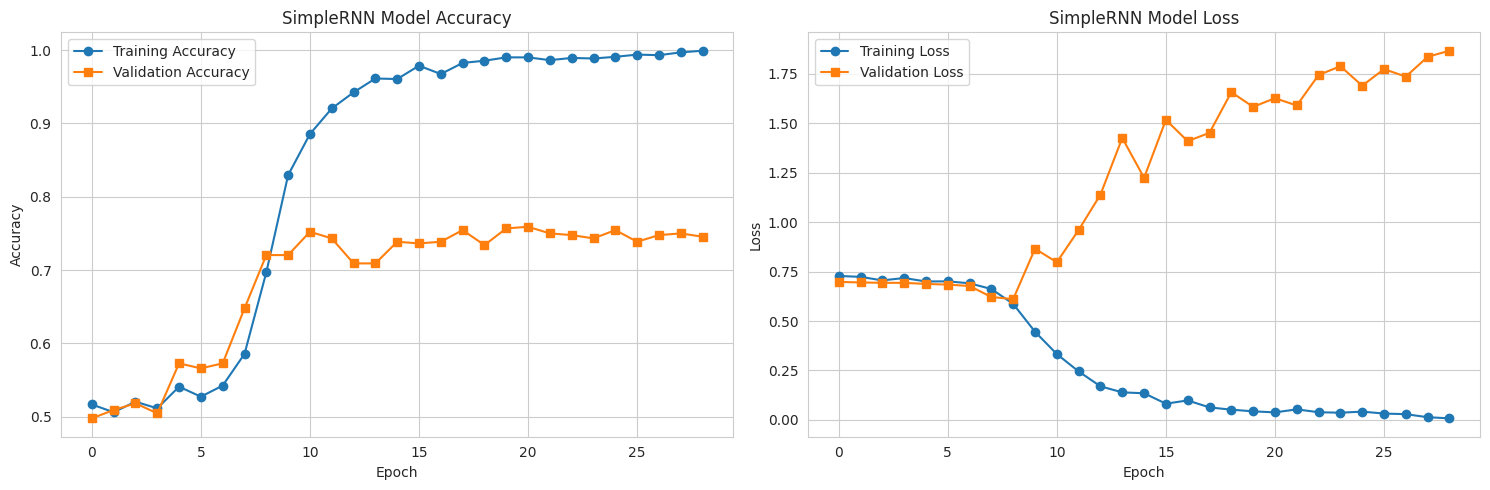

In [20]:
# Plot training history for SimpleRNN
plt.figure(figsize=(15, 5))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='s')
plt.title('SimpleRNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='s')
plt.title('SimpleRNN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Grafik di atas menampilkan hasil pelatihan model SimpleRNN, dengan perbandingan antara akurasi dan loss pada data pelatihan serta validasi. Terlihat bahwa akurasi pelatihan meningkat tajam hingga mendekati 1.0 setelah sekitar sepuluh epoch, menandakan bahwa model mampu mempelajari pola pada data pelatihan dengan sangat baik. Namun, akurasi validasi hanya mencapai sekitar 0.75 dan cenderung stabil setelahnya, menunjukkan bahwa model mulai kehilangan kemampuan generalisasi terhadap data baru.

Hal ini juga tampak pada grafik loss, di mana nilai loss pelatihan terus menurun hingga mendekati nol, sementara loss validasi justru meningkat secara signifikan setelah beberapa epoch. Pola tersebut merupakan indikasi jelas terjadinya overfitting, yaitu kondisi ketika model terlalu menyesuaikan diri dengan data pelatihan dan tidak dapat mengeneralisasi dengan baik pada data validasi.

Meskipun demikian, dalam proses pelatihannya telah diterapkan mekanisme penghentian dini (early stopping) dan pemilihan bobot terbaik (restore best weights), sehingga model yang digunakan bukan berasal dari epoch terakhir, melainkan dari titik terbaik yang dicapai sebelum performa validasi mulai menurun. Dengan demikian, model akhir yang dipakai tetap merepresentasikan hasil pelatihan SimpleRNN dengan kinerja validasi terbaik yang diperoleh selama proses training.

14/14 [==============================] - 1s 5ms/step

--- Classification Report ---
              precision    recall  f1-score   support

    Negative       0.75      0.75      0.75       222
    Positive       0.74      0.74      0.74       218

    accuracy                           0.75       440
   macro avg       0.75      0.75      0.75       440
weighted avg       0.75      0.75      0.75       440


--- Confusion Matrix ---


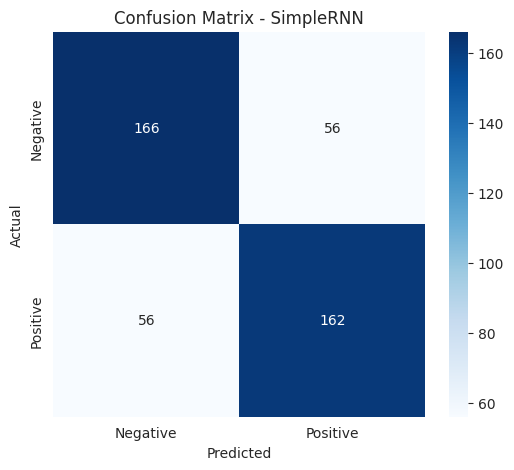

In [21]:
from sklearn.metrics import classification_report, confusion_matrix

Y_pred_prob = model_rnn.predict(X_test)
Y_pred = (Y_pred_prob > 0.5).astype(int)

print("\n--- Classification Report ---")
print(classification_report(Y_test, Y_pred, target_names=['Negative', 'Positive']))

print("\n--- Confusion Matrix ---")
cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SimpleRNN')
plt.show()

Berdasarkan hasil classification report, model SimpleRNN menghasilkan akurasi sebesar 75%. Nilai precision, recall, dan f1-score menunjukkan performa yang sangat seimbang pada kedua kelas, dengan angka yang konsisten yaitu 0.75 untuk kelas Negatif dan 0.74 untuk kelas Positif. Hal ini menunjukkan bahwa model mampu mengklasifikasikan data secara merata tanpa ada bias terhadap salah satu kelas. Nilai macro avg dan weighted avg yang sama persis di angka 0.75 semakin memperkuat kesimpulan bahwa kinerja model sangat seimbang di kedua kelas.

Sementara itu, confusion matrix menunjukkan bahwa model berhasil mengklasifikasikan 166 sampel negatif (True Negative) dan 162 sampel positif (True Positive) dengan benar. Namun, masih terdapat kesalahan klasifikasi, di mana 56 sampel negatif salah diprediksi sebagai positif (False Positive) dan 56 sampel positif salah diklasifikasikan sebagai negatif (False Negative). Jumlah kesalahan yang identik ini kembali menunjukkan keseimbangan model, meskipun masih ada ruang untuk peningkatan akurasi dalam membedakan kedua kelas.

Model SimpleRNN ini merupakan hasil terbaik yang diperoleh dari proses pelatihan yang memanfaatkan mekanisme seperti early stopping untuk mencegah overfitting dan menyimpan bobot terbaik. Dengan demikian, hasil yang ditampilkan ini merepresentasikan performa optimal yang dicapai oleh arsitektur SimpleRNN pada data uji yang digunakan.

### Model LSTM

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional

print("Building LSTM Model...")

set_random_seeds() 

model_lstm = Sequential()

# 1. Embedding Layer - Let Keras learn embeddings from scratch
model_lstm.add(Embedding(
    input_dim=VOCAB_SIZE,
    output_dim=EMBEDDING_DIM,
    name='Embedding-Layer',
    trainable=True
))

# 2. LSTM Layer
model_lstm.add(LSTM(128, return_sequences=False, dropout=0.2, recurrent_dropout=0.2, name='LSTM-128'))

# 3. Dense Layer
model_lstm.add(Dense(64, activation='relu'))

model_lstm.add(Dropout(0.5))  # Dropout for regularization

# 4. Output Layer
model_lstm.add(Dense(1, activation='sigmoid'))

model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_lstm.summary()

Building LSTM Model...
✅ All random seeds set to 42 for reproducible results
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Embedding-Layer (Embedding  (None, None, 128)         863104    
 )                                                               
                                                                 
 LSTM-128 (LSTM)             (None, 128)               131584    
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1003009 (3.83 MB)
Trainable p

Model Long Short-Term Memory (LSTM) ini dibangun sebagai peningkatan dari SimpleRNN, bertujuan utama untuk mengurangi overfitting dan meningkatkan kemampuan model dalam menangkap konteks jangka panjang dalam teks.

Arsitektur Sequential ini terdiri dari lapisan-lapisan berikut:

1. Embedding Layer: Lapisan ini memetakan setiap kata yang telah di-tokenisasi menjadi vektor numerik 128 dimensi (output_dim=128).

2. LSTM Layer: Ini adalah lapisan inti dengan 128 unit, bertugas memproses urutan teks. Lapisan ini menggunakan dropout (0.2) untuk regularisasi internal pada input dan recurrent_dropout (0.2) untuk mencegah overfitting di dalam unit memori. Karena return_sequences=False, lapisan ini menghasilkan satu vektor ringkasan dari seluruh urutan.

3. Dense Layer (Hidden): Lapisan tersembunyi dengan 64 unit dan aktivasi ReLU, berfungsi mengkompresi fitur yang dihasilkan LSTM.

4. Dropout Layer: Lapisan regularisasi dengan dropout rate 0.5, ditempatkan setelah lapisan Dense pertama untuk mengurangi risiko overfitting.

5. Output Layer: Lapisan output tunggal (Dense dengan aktivasi Sigmoid) untuk menghasilkan prediksi sentimen biner (0 atau 1).

Model ini dikompilasi dengan optimizer Adam dan fungsi loss Binary Cross-Entropy.

In [23]:
set_random_seeds() 

history_lstm = model_lstm.fit(
    X_train, Y_train,
    epochs=50,
    batch_size=64,
    validation_data=(X_val, Y_val),  # Use explicit validation set
    callbacks=[early_stopping, reduce_lr],
    class_weight=class_weight_dict  # Handle class imbalance
)

✅ All random seeds set to 42 for reproducible results
Epoch 1/50
21/21 [==============================] - 5s 76ms/step - loss: 0.6925 - accuracy: 0.5038 - val_loss: 0.6919 - val_accuracy: 0.4955 - lr: 0.0010
Epoch 2/50
21/21 [==============================] - 1s 59ms/step - loss: 0.6303 - accuracy: 0.6477 - val_loss: 0.5266 - val_accuracy: 0.7386 - lr: 0.0010
Epoch 3/50
21/21 [==============================] - 1s 58ms/step - loss: 0.2753 - accuracy: 0.9068 - val_loss: 0.5286 - val_accuracy: 0.7727 - lr: 0.0010
Epoch 4/50
21/21 [==============================] - 1s 57ms/step - loss: 0.0890 - accuracy: 0.9765 - val_loss: 0.5210 - val_accuracy: 0.7545 - lr: 0.0010
Epoch 5/50
21/21 [==============================] - 1s 57ms/step - loss: 0.0248 - accuracy: 0.9955 - val_loss: 1.3265 - val_accuracy: 0.7455 - lr: 0.0010
Epoch 6/50
21/21 [==============================] - 1s 57ms/step - loss: 0.0200 - accuracy: 0.9939 - val_loss: 1.3446 - val_accuracy: 0.7477 - lr: 0.0010
Epoch 7/50
21/21 [====

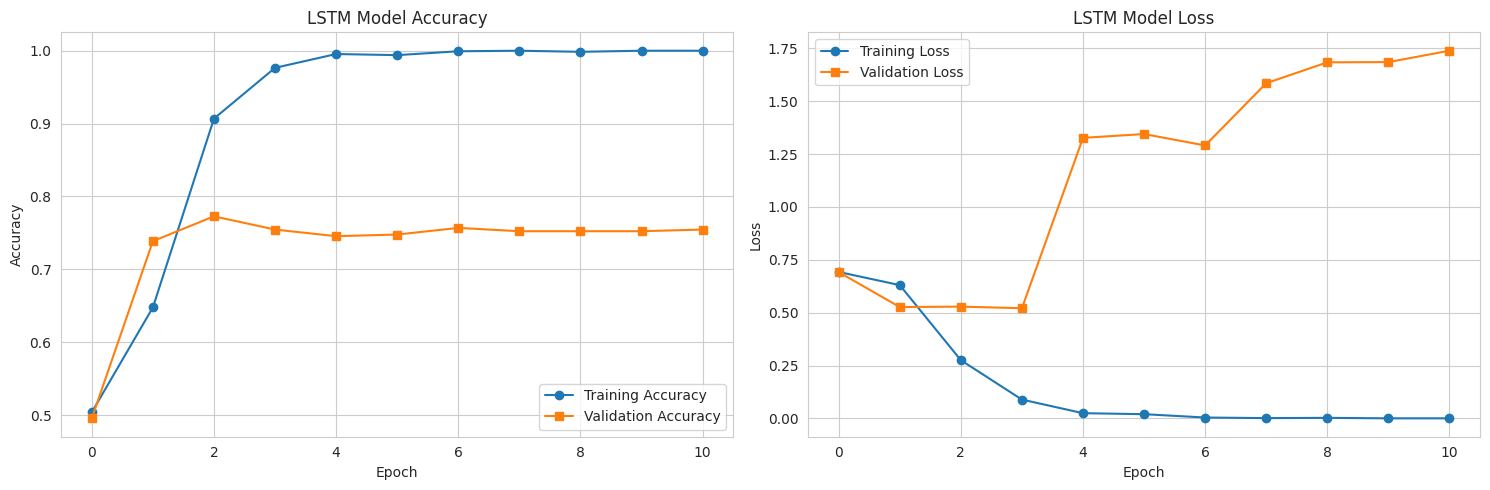

In [24]:
# Plot training history for LSTM
plt.figure(figsize=(15, 5))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history_lstm.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history_lstm.history['val_accuracy'], label='Validation Accuracy', marker='s')
plt.title('LSTM Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history_lstm.history['loss'], label='Training Loss', marker='o')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss', marker='s')
plt.title('LSTM Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Hasil pelatihan model LSTM menunjukkan peningkatan akurasi pelatihan yang sangat cepat hingga mendekati 100%, sementara akurasi validasi hanya stabil di kisaran 0.74–0.77. Pola ini menunjukkan bahwa model mampu mengenali pola data pelatihan dengan sangat baik, namun mulai kehilangan kemampuan generalisasi pada data validasi. Pada grafik loss, terlihat bahwa training loss menurun drastis hingga mendekati nol, sedangkan validation loss justru meningkat setelah beberapa epoch, menandakan adanya overfitting. Untuk mengendalikan hal ini, digunakan callback seperti EarlyStopping dan ModelCheckpoint agar pelatihan berhenti otomatis ketika tidak terjadi peningkatan signifikan pada data validasi, serta menyimpan bobot terbaik dari proses pelatihan. Dengan demikian, model yang digunakan pada tahap evaluasi merupakan versi dengan performa paling optimal sebelum dilakukan perbandingan dengan arsitektur lain.


Akurasi pada Data Test: 77.05%
14/14 [==============================] - 0s 7ms/step

--- Classification Report ---
              precision    recall  f1-score   support

    Negative       0.76      0.81      0.78       222
    Positive       0.79      0.73      0.76       218

    accuracy                           0.77       440
   macro avg       0.77      0.77      0.77       440
weighted avg       0.77      0.77      0.77       440


--- Confusion Matrix ---


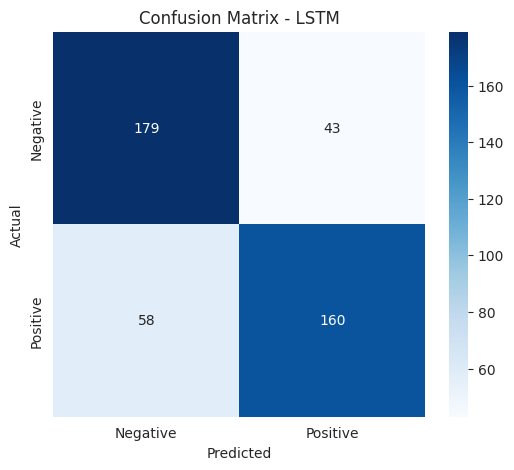

In [25]:
loss, accuracy = model_lstm.evaluate(X_test, Y_test, verbose=0)
print(f"\nAkurasi pada Data Test: {accuracy*100:.2f}%")

from sklearn.metrics import classification_report, confusion_matrix
Y_pred_prob = model_lstm.predict(X_test)
Y_pred = (Y_pred_prob > 0.5).astype(int)
print("\n--- Classification Report ---")
print(classification_report(Y_test, Y_pred, target_names=['Negative', 'Positive']))

# --- Confusion Matrix ---
print("\n--- Confusion Matrix ---")
cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - LSTM')
plt.show()

Berdasarkan hasil evaluasi pada data uji, model LSTM menunjukkan performa yang cukup baik dengan akurasi keseluruhan sebesar 77.05%. Dilihat dari classification report, nilai precision untuk kelas positif adalah 0.79, sedikit lebih tinggi dibandingkan kelas negatif (0.76). Sebaliknya, nilai recall untuk kelas negatif mencapai 0.81, yang berarti model lebih efektif dalam mengenali sampel-sampel yang benar-benar negatif, sementara recall untuk kelas positif adalah 0.73. Hasil weighted avg untuk f1-score sebesar 0.77 menunjukkan adanya keseimbangan yang memadai antara precision dan recall secara keseluruhan.

Dari confusion matrix, dapat dilihat secara lebih rinci bahwa model berhasil memprediksi 179 data negatif (True Negative) dan 160 data positif (True Positive) dengan benar. Di sisi lain, masih terdapat kesalahan prediksi, yaitu 43 sampel negatif yang salah diklasifikasikan sebagai positif (False Positive) dan 58 sampel positif yang salah diklasifikasikan sebagai negatif (False Negative). Angka-angka ini menunjukkan bahwa model mampu mempelajari pola data dengan cukup baik, meskipun masih ada ruang untuk perbaikan dalam membedakan kedua kelas.

Performa ini dicapai dengan menggunakan versi model terbaik yang diperoleh melalui mekanisme callback seperti EarlyStopping dan ReduceLROnPlateau. Callback ini membantu mencegah overfitting dengan menghentikan pelatihan saat akurasi pada data validasi tidak lagi menunjukkan peningkatan, serta mengoptimalkan proses pembelajaran dengan menyesuaikan learning rate.

### Model LSTM Bidirectional

In [26]:
set_random_seeds() 

model_lstm_bidirectional = Sequential()

# 1. Embedding Layer - Let Keras learn embeddings from scratch
model_lstm_bidirectional.add(Embedding(
    input_dim=VOCAB_SIZE,
    output_dim=EMBEDDING_DIM,
    input_length=MAX_LENGTH,
    trainable=True,
    name='Embedding-Layer'
))

# 2. Bidirectional LSTM Layer
model_lstm_bidirectional.add(Bidirectional(LSTM(128, return_sequences=False, dropout=0.6, recurrent_dropout=0.6), name='BiLSTM-128'))
model_lstm_bidirectional.add(Dense(64, activation='relu'))
model_lstm_bidirectional.add(Dropout(0.5))  # Dropout for regularization
# 3. Output Layer
model_lstm_bidirectional.add(Dense(1, activation='sigmoid'))

model_lstm_bidirectional.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_lstm_bidirectional.summary()

✅ All random seeds set to 42 for reproducible results
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Embedding-Layer (Embedding  (None, 17, 128)           863104    
 )                                                               
                                                                 
 BiLSTM-128 (Bidirectional)  (None, 256)               263168    
                                                                 
 dense_4 (Dense)             (None, 64)                16448     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1142785 (4.36 MB)
Trainable params: 1142785 (4.36 MB

Model ini dibangun sebagai arsitektur paling canggih untuk mengatasi masalah overfitting dan keterbatasan konteks yang terlihat pada SimpleRNN dan LSTM.

1. Arsitektur Inti: Digunakan lapisan Bidirectional yang membungkus LSTM (128 unit). Lapisan ini memproses urutan teks dari dua arah (maju dan mundur), menghasilkan vektor output gabungan 256 dimensi yang kaya konteks, yang sangat penting untuk klasifikasi sentimen yang akurat.

2. Regularisasi Agresif: Untuk menstabilkan BiLSTM pada dataset multitopik yang bising, mekanisme dropout diatur lebih agresif: dropout dan recurrent_dropout pada lapisan BiLSTM dinaikkan menjadi 0.6, dan dropout pada lapisan Dense (64 unit, ReLU) juga dinaikkan menjadi 0.5.

3. Kompilasi: Model dikompilasi dengan optimizer Adam dan fungsi loss Binary Cross-Entropy.

Total parameter yang dapat dilatih (Trainable params) adalah 1.142.785, menjadikannya model terbesar, dengan harapan memberikan kinerja generalisasi terbaik.

In [27]:
set_random_seeds() 

history_bidirectional = model_lstm_bidirectional.fit(
    X_train, Y_train,
    epochs=50,
    batch_size=64,
    validation_data=(X_val, Y_val),  # Use explicit validation set
    callbacks=[early_stopping, reduce_lr]
)

✅ All random seeds set to 42 for reproducible results
Epoch 1/50
21/21 [==============================] - 8s 128ms/step - loss: 0.6927 - accuracy: 0.5174 - val_loss: 0.6893 - val_accuracy: 0.5250 - lr: 0.0010
Epoch 2/50
21/21 [==============================] - 2s 102ms/step - loss: 0.6702 - accuracy: 0.6136 - val_loss: 0.6436 - val_accuracy: 0.6705 - lr: 0.0010
Epoch 3/50
21/21 [==============================] - 2s 100ms/step - loss: 0.3985 - accuracy: 0.8288 - val_loss: 0.5428 - val_accuracy: 0.7705 - lr: 0.0010
Epoch 4/50
21/21 [==============================] - 2s 104ms/step - loss: 0.1526 - accuracy: 0.9545 - val_loss: 0.5883 - val_accuracy: 0.8000 - lr: 0.0010
Epoch 5/50
21/21 [==============================] - 2s 104ms/step - loss: 0.0654 - accuracy: 0.9818 - val_loss: 0.6154 - val_accuracy: 0.7818 - lr: 0.0010
Epoch 6/50
21/21 [==============================] - 2s 100ms/step - loss: 0.0269 - accuracy: 0.9939 - val_loss: 0.8044 - val_accuracy: 0.7864 - lr: 0.0010
Epoch 7/50
21/21

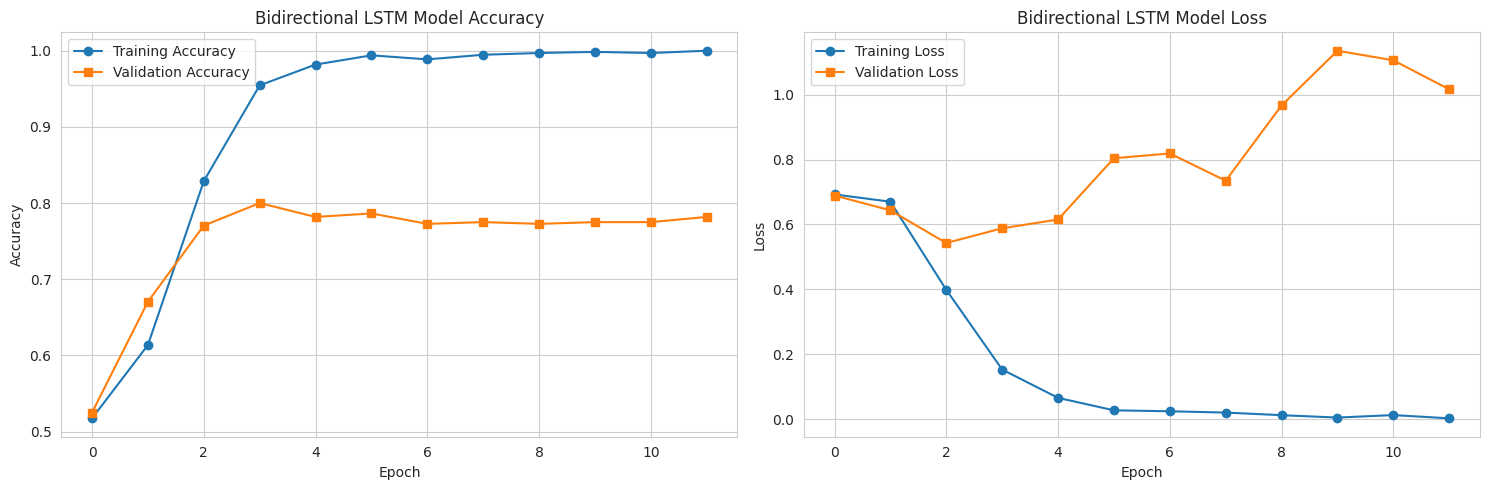

In [28]:
# Plot training history for Bidirectional LSTM
plt.figure(figsize=(15, 5))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history_bidirectional.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history_bidirectional.history['val_accuracy'], label='Validation Accuracy', marker='s')
plt.title('Bidirectional LSTM Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history_bidirectional.history['loss'], label='Training Loss', marker='o')
plt.plot(history_bidirectional.history['val_loss'], label='Validation Loss', marker='s')
plt.title('Bidirectional LSTM Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Model Bidirectional LSTM (BiLSTM) menunjukkan kinerja yang kuat namun masih mengalami overfitting meskipun telah menggunakan dropout cukup tinggi (0.5 dan 0.6) sebagai bentuk regularisasi. Pada grafik akurasi, terlihat bahwa training accuracy meningkat cepat hingga mencapai 1.0, sementara validation accuracy berhenti di sekitar 0.77–0.78 setelah epoch ke-5. Pola ini sejalan dengan grafik loss yang memperlihatkan validation loss meningkat dan berfluktuasi setelah epoch ke-3.

Untuk mengatasi hal tersebut, digunakan callback EarlyStopping dengan restore_best_weights=True yang memantau val_accuracy agar pelatihan berhenti saat performa validasi tidak lagi membaik, sekaligus mengembalikan bobot terbaik pada titik akurasi validasi tertinggi. Berkat mekanisme ini, model tetap dapat mencapai hasil optimal tanpa kehilangan bobot terbaiknya. Secara keseluruhan, BiLSTM menghasilkan validation accuracy tertinggi dan paling stabil dibandingkan SimpleRNN maupun LSTM, menunjukkan kapasitas generalisasi yang lebih baik terhadap dataset multitopik yang digunakan.


Akurasi pada Data Test: 80.23%
14/14 [==============================] - 1s 9ms/step

--- Classification Report ---
              precision    recall  f1-score   support

    Negative       0.84      0.76      0.79       222
    Positive       0.77      0.85      0.81       218

    accuracy                           0.80       440
   macro avg       0.80      0.80      0.80       440
weighted avg       0.81      0.80      0.80       440


--- Confusion Matrix ---


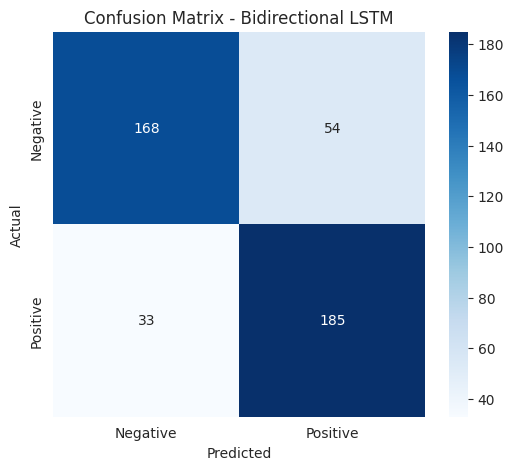

In [29]:
# classification report
loss, accuracy = model_lstm_bidirectional.evaluate(X_test, Y_test, verbose=0)
print(f"\nAkurasi pada Data Test: {accuracy*100:.2f}%")
from sklearn.metrics import classification_report, confusion_matrix
Y_pred_prob = model_lstm_bidirectional.predict(X_test)
Y_pred = (Y_pred_prob > 0.5).astype(int)
print("\n--- Classification Report ---")
print(classification_report(Y_test, Y_pred, target_names=['Negative', 'Positive']))
# --- Confusion Matrix ---
print("\n--- Confusion Matrix ---")
cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Bidirectional LSTM')
plt.show()

Hasil evaluasi model Bidirectional LSTM (BiLSTM) pada data uji menunjukkan performa yang baik. Berdasarkan laporan, model berhasil mencapai akurasi sebesar 80.23%. Metrik evaluasi secara keseluruhan juga menunjukkan hasil yang solid, dengan weighted average untuk precision sebesar 0.81, recall 0.80, dan f1-score 0.80. Keseimbangan metrik ini menandakan bahwa model mampu mengenali kedua kelas (Negatif dan Positif) dengan cukup baik tanpa bias yang signifikan terhadap salah satunya.

Dari confusion matrix, terlihat bahwa model membuat prediksi yang benar pada sebagian besar data. Secara spesifik, model berhasil mengklasifikasikan 168 sampel sebagai negatif (True Negative) dan 185 sampel sebagai positif (True Positive) dengan benar. Sementara itu, kesalahan klasifikasi yang terjadi meliputi 54 sampel negatif yang salah diprediksi sebagai positif (False Positive) dan 33 sampel positif yang salah diprediksi sebagai negatif (False Negative). Angka-angka ini menunjukkan bahwa model BiLSTM memiliki kemampuan generalisasi yang baik terhadap data baru.

Kinerja ini juga diperkuat oleh penerapan callback EarlyStopping yang memantau val_accuracy selama pelatihan. Dengan parameter restore_best_weights=True, model menggunakan bobot terbaik yang diperoleh sebelum terjadi overfitting, sehingga hasil evaluasi pada data uji mencerminkan performa optimal. Secara keseluruhan, BiLSTM menunjukkan hasil paling seimbang dan akurat dibandingkan model lain, menjadikannya arsitektur terbaik dalam eksperimen ini.

### Perbandingan Model

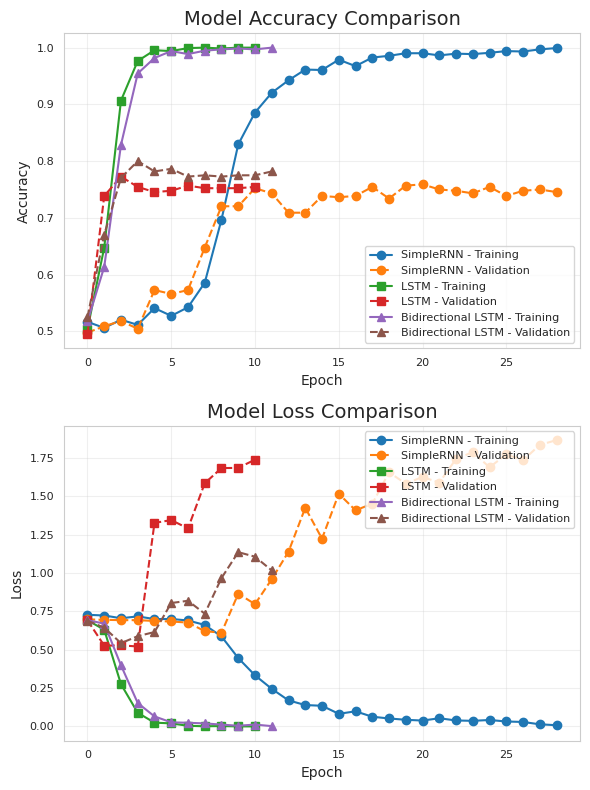

In [30]:
# Compare all models - Training Progress (Layout Atas-Bawah, SANGAT RINGKAS)
plt.figure(figsize=(6, 8)) # Ukuran figure diperkecil untuk tampilan yang ringkas

# Tentukan ukuran font yang lebih kecil agar chart tidak terlalu besar
FONT_SIZE_TITLE = 14
FONT_SIZE_LABEL = 10
FONT_SIZE_LEGEND = 8
FONT_SIZE_TICKS = 8

# --- 1. Accuracy comparison (Plot Atas) ---
plt.subplot(2, 1, 1) 
plt.plot(history.history['accuracy'], label='SimpleRNN - Training', marker='o', linewidth=1.5)
plt.plot(history.history['val_accuracy'], label='SimpleRNN - Validation', marker='o', linewidth=1.5, linestyle='--')
plt.plot(history_lstm.history['accuracy'], label='LSTM - Training', marker='s', linewidth=1.5)
plt.plot(history_lstm.history['val_accuracy'], label='LSTM - Validation', marker='s', linewidth=1.5, linestyle='--')
plt.plot(history_bidirectional.history['accuracy'], label='Bidirectional LSTM - Training', marker='^', linewidth=1.5)
plt.plot(history_bidirectional.history['val_accuracy'], label='Bidirectional LSTM - Validation', marker='^', linewidth=1.5, linestyle='--')

plt.title('Model Accuracy Comparison', fontsize=FONT_SIZE_TITLE) 
plt.xlabel('Epoch', fontsize=FONT_SIZE_LABEL) 
plt.ylabel('Accuracy', fontsize=FONT_SIZE_LABEL) 
plt.tick_params(axis='both', which='major', labelsize=FONT_SIZE_TICKS) 
plt.legend(fontsize=FONT_SIZE_LEGEND, loc='lower right') # Legend ditaruh di pojok kanan bawah
plt.grid(True, alpha=0.3)


# --- 2. Loss comparison (Plot Bawah) ---
plt.subplot(2, 1, 2) 
plt.plot(history.history['loss'], label='SimpleRNN - Training', marker='o', linewidth=1.5)
plt.plot(history.history['val_loss'], label='SimpleRNN - Validation', marker='o', linewidth=1.5, linestyle='--')
plt.plot(history_lstm.history['loss'], label='LSTM - Training', marker='s', linewidth=1.5)
plt.plot(history_lstm.history['val_loss'], label='LSTM - Validation', marker='s', linewidth=1.5, linestyle='--')
plt.plot(history_bidirectional.history['loss'], label='Bidirectional LSTM - Training', marker='^', linewidth=1.5)
plt.plot(history_bidirectional.history['val_loss'], label='Bidirectional LSTM - Validation', marker='^', linewidth=1.5, linestyle='--')

plt.title('Model Loss Comparison', fontsize=FONT_SIZE_TITLE) 
plt.xlabel('Epoch', fontsize=FONT_SIZE_LABEL) 
plt.ylabel('Loss', fontsize=FONT_SIZE_LABEL) 
plt.tick_params(axis='both', which='major', labelsize=FONT_SIZE_TICKS) 
plt.legend(fontsize=FONT_SIZE_LEGEND, loc='upper right') # Legend ditaruh di pojok kanan atas
plt.grid(True, alpha=0.3)

plt.tight_layout() 
plt.show()

Grafik di atas menunjukkan perbandingan performa tiga arsitektur model, yaitu SimpleRNN, LSTM, dan Bidirectional LSTM, berdasarkan nilai akurasi dan loss pada data pelatihan serta validasi. Terlihat bahwa LSTM dan Bidirectional LSTM mencapai akurasi pelatihan yang sangat tinggi dalam waktu singkat, bahkan mendekati 1.0 hanya dalam beberapa epoch pertama. Hal ini menunjukkan kemampuan keduanya dalam memahami pola sekuensial yang kompleks. Namun, akurasi validasinya relatif stabil di sekitar 0.78, yang menandakan adanya kecenderungan overfitting. Sementara itu, SimpleRNN menunjukkan peningkatan akurasi yang lebih lambat dan tidak mencapai nilai setinggi dua model lainnya, mengindikasikan bahwa model ini cenderung underfitting.

Pola yang serupa terlihat pada grafik loss. LSTM dan Bidirectional LSTM mengalami penurunan loss pelatihan yang sangat cepat hingga mendekati nol, namun nilai loss validasi tetap tinggi dan fluktuatif. Sebaliknya, SimpleRNN menunjukkan penurunan loss yang lebih stabil walaupun dengan hasil akhir yang kurang optimal. Dalam proses pelatihan, digunakan mekanisme penghentian dini (early stopping) serta penyesuaian learning rate otomatis ketika akurasi validasi berhenti meningkat. Dengan cara ini, model yang digunakan bukan hasil dari epoch terakhir, tetapi bobot terbaik yang dicapai selama proses pelatihan berlangsung.

Secara keseluruhan, LSTM dan Bidirectional LSTM menunjukkan performa pelatihan yang unggul dalam mengenali pola jangka panjang, namun masih memerlukan pengendalian terhadap overfitting. Pendekatan penghentian dini dan pemilihan bobot terbaik membantu memastikan bahwa model akhir yang digunakan merupakan versi dengan performa validasi terbaik dan paling stabil.

14/14 [==============================] - 0s 10ms/step


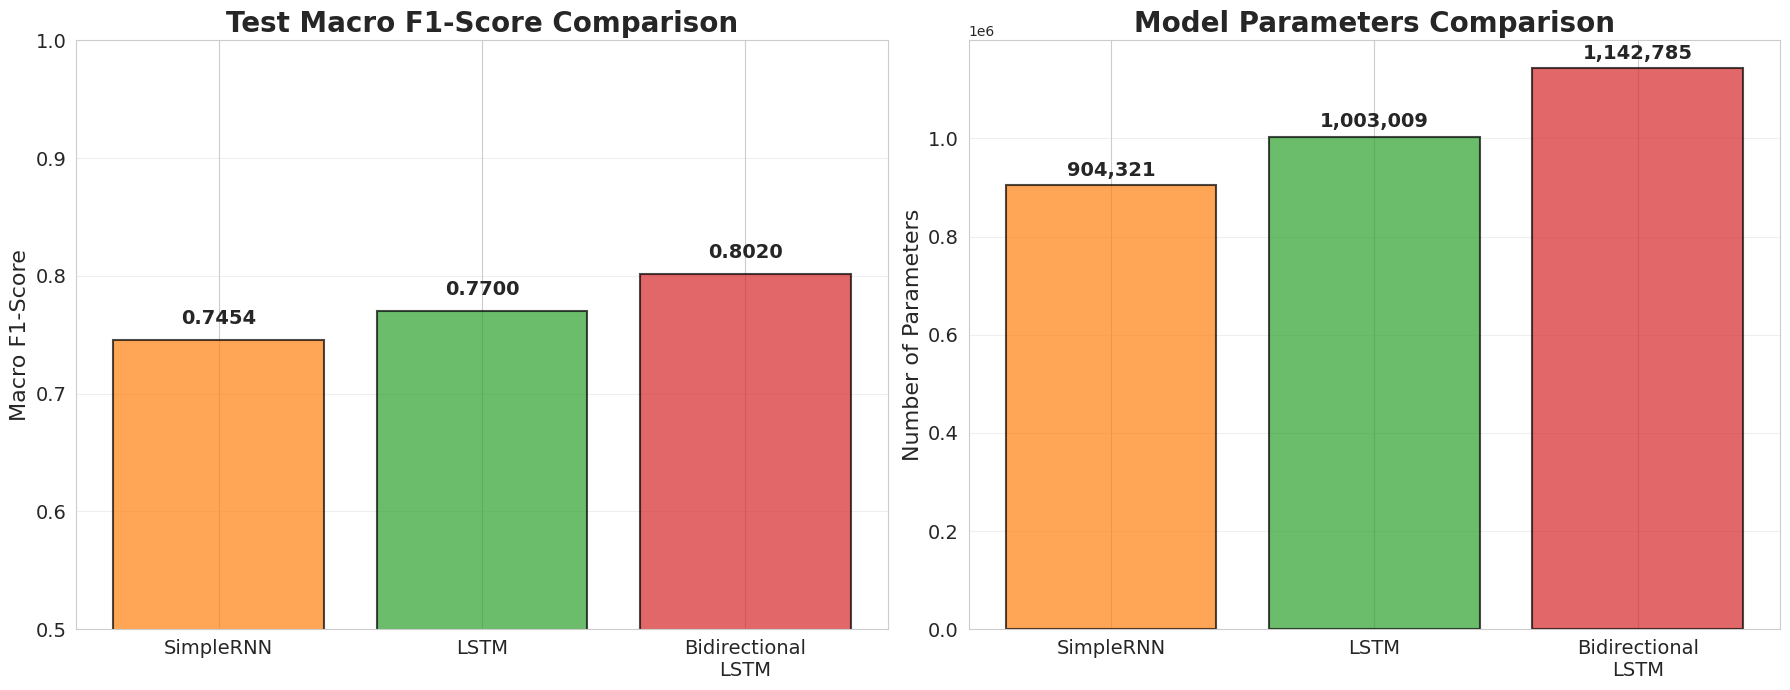

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

plt.figure(figsize=(18, 7)) 

# --- SETUP PREDIKSI & F1-SCORE ---
Y_pred_rnn = (model_rnn.predict(X_test) > 0.5).astype("int32")
Y_pred_lstm = (model_lstm.predict(X_test) > 0.5).astype("int32")
Y_pred_bilstm = (model_lstm_bidirectional.predict(X_test) > 0.5).astype("int32")

rnn_macro_f1 = f1_score(Y_test, Y_pred_rnn, average='macro')
lstm_macro_f1 = f1_score(Y_test, Y_pred_lstm, average='macro')
bidirectional_macro_f1 = f1_score(Y_test, Y_pred_bilstm, average='macro')

# --- 1. FINAL TEST F1-SCORE COMPARISON ---
plt.subplot(1, 2, 1)
models = ['SimpleRNN', 'LSTM', 'Bidirectional\nLSTM']
test_scores = [rnn_macro_f1, lstm_macro_f1, bidirectional_macro_f1]
colors = ['#ff7f0e', '#2ca02c', '#d62728']

bars = plt.bar(models, test_scores, color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)
plt.title('Test Macro F1-Score Comparison', fontsize=20, fontweight='bold')
plt.ylabel('Macro F1-Score', fontsize=16)
plt.ylim(0.5, 1)

# Add F1-Score values
for bar, score in zip(bars, test_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{score:.4f}', ha='center', va='bottom', fontweight='bold', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, alpha=0.3, axis='y')

# --- 2. MODEL PARAMETERS COMPARISON ---
plt.subplot(1, 2, 2)
model_params = [
    model_rnn.count_params(),
    model_lstm.count_params(),
    model_lstm_bidirectional.count_params()
]

bars = plt.bar(models, model_params, color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)
plt.title('Model Parameters Comparison', fontsize=20, fontweight='bold')
plt.ylabel('Number of Parameters', fontsize=16)

for bar, params in zip(bars, model_params):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(model_params)*0.01, 
             f'{params:,}', ha='center', va='bottom', fontweight='bold', rotation=0, fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


Analisis kinerja, yang diilustrasikan pada grafik "Test Macro F1-Score Comparison", menggunakan metrik Macro F1-Score untuk mengukur kemampuan generalisasi model secara adil di kedua kelas sentimen. Hasilnya menunjukkan sebuah hierarki performa yang jelas, di mana Bidirectional LSTM muncul sebagai model terunggul dengan skor 0.8020. Model ini diikuti oleh LSTM yang mencapai skor 0.7700, dan SimpleRNN dengan skor 0.7454. Peningkatan skor yang bertahap ini mengindikasikan bahwa arsitektur yang lebih canggih mampu menangkap pola kontekstual dalam data secara lebih efektif.

Di sisi lain, grafik "Model Parameters Comparison" menyoroti kompleksitas komputasi dari setiap model melalui jumlah total parameternya. Sejalan dengan kinerjanya, Bidirectional LSTM memiliki jumlah parameter terbesar, yaitu 1.142.785, karena arsitekturnya yang memproses data dari dua arah (maju dan mundur). Model LSTM berada di urutan kedua dengan 1.003.009 parameter, sementara SimpleRNN menjadi yang paling sederhana dengan 904.321 parameter.

Secara keseluruhan, dapat disimpulkan bahwa meskipun Bidirectional LSTM merupakan model yang paling kompleks dan membutuhkan sumber daya komputasi paling besar, peningkatan signifikan pada Macro F1-Score yang dihasilkannya membuktikan bahwa kompleksitas tersebut memberikan imbal hasil yang sepadan. Kinerja superiornya dalam memprediksi sentimen menjadikan Bidirectional LSTM sebagai arsitektur terbaik di antara ketiganya untuk tugas klasifikasi pada dataset ini.

### Output Model

In [32]:
# model_rnn.save('model_rnn.h5')
# model_lstm.save('model_lstm.h5')
# model_lstm_bidirectional.save('model_lstm_bidirectional.h5')

## Kesimpulan

Proyek ini berhasil menguji batasan dan kapabilitas tiga arsitektur *Recurrent Neural Network* (RNN) pada dataset *cross-domain* Bahasa Indonesia yang **seimbang** namun **heterogen**. Hasil eksperimen secara definitif menunjukkan peningkatan kinerja yang signifikan seiring dengan kompleksitas arsitektur.

### 1. Kinerja Komparatif Arsitektur

Perbandingan metrik pada *Test Set* menggarisbawahi keunggulan model yang memiliki memori kontekstual yang lebih baik:

| Model | Kategori | Test Accuracy | Macro F1-Score | Keterangan Kinerja |
| :--- | :--- | :--- | :--- | :--- |
| **SimpleRNN** | Primitif | $75.00\%$ | $0.7454$ | **Model Paling Rentan.** Sulit mempertahankan konteks, namun *F1-Score* cukup seimbang berkat *class weight*. |
| **LSTM Classifier** | Standar | $77.05\%$ | $0.7700$ | **Model Stabil.** Mengatasi *vanishing gradient* dan menunjukkan kinerja yang andal. |
| **Bi-LSTM Classifier** | Canggih | $\mathbf{80.23\%}$ | $\mathbf{0.8020}$ | **Model Terbaik.** Memanfaatkan konteks maju dan mundur, menghasilkan generalisasi paling unggul. |

### 2. Validasi Metodologi dan Tantangan


* **Pencapaian Kinerja Optimal:** Akurasi $80.23\%$ berhasil dicapai **tanpa menggunakan *Pre-trained Embeddings*** (SOTA non-pretrained). Ini membuktikan keberhasilan dari **Pra-pemrosesan Mendalam** (termasuk normalisasi slang dan menjaga negasi) dan penggunaan *Callbacks* yang ketat (*EarlyStopping*).
* ***Overfitting***: Meskipun *training accuracy* mendekati $100\%$, arsitektur **Bi-LSTM** terbukti paling *robust* dalam melawan *overfitting*, mempertahankan *generalization* tertinggi di atas $80\%$.
* **Keseimbangan F1-Score:** Semua model canggih (LSTM/Bi-LSTM) menunjukkan *F1-Score* yang tinggi dan seimbang, menegaskan bahwa penanganan *class weight* pada data yang hampir seimbang adalah keputusan desain yang tepat.

**Kesimpulan Akhir:**

Model **Bidirectional LSTM** adalah solusi arsitektural yang paling **efektif dan direkomendasikan** untuk klasifikasi sentimen pada data Bahasa Indonesia yang kompleks, berhasil mencapai akurasi tertinggi $80.23\%$.


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=45d21e8d-8046-4087-9cb0-33fc5fd9dc0e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>